In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import warnings

# Configuración de visualizaciones
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Carga del dataset

df = pd.read_csv('../data/bodyperformance.csv')

# Visualización inicial de los datos
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
print(df.head())

Dimensiones del dataset: (13393, 12)

Primeras 5 filas del dataset:
    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  


Explicaremos solo las variables que no se puedan entender a simple vista:

body fat_%: es el porcentaje del peso total del cuerpo que corresponde a grasa. En fórmula: (masa grasa/peso total) x 100

diastolic: presión arterial cuando el corazón está en reposo entre latidos

systolic: presión arterial durante la contracción del corazón cuando expulsa la sangre

gripForce: fuerza de agarre, fuerza máxima que una persona puede ejercer con la mano usando un dinamómetro

sit and bend forward_cm: prueba de flexibilidad en la que una persona se sienta con las piernas estiradas y se inclina hacia adelante,midiendo
cuántos cm alcanza con las manos más allá de los pies.

sit-ups counts: número de abdominales que la persona puede realizar en un tiempo determinado

broad jump_cm: distancia que una persona puede saltar hacia adelante desde posición estática.
    

**INFO GENERAL**


In [2]:
# Información general sobre tipos de datos y completitud
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print("\nInformación de columnas y tipos de datos:")
df.info()

print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
df.describe().round(2)

# Verificación de valores nulos
print("\n" + "=" * 80)
print("VALORES NULOS POR COLUMNA")
print("=" * 80)
df.isnull().sum()
print(f"\nPorcentaje total de valores nulos: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Valores únicos por columna
print("\n" + "=" * 80)
print("VALORES ÚNICOS POR COLUMNA")
print("=" * 80)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

INFORMACIÓN GENERAL DEL DATASET

Información de columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB

ESTADÍ

*ANALISIS DE VARIABLE OBJETIVO CLASS*

ANÁLISIS DE LA VARIABLE OBJETIVO: CLASS

Distribución de clases:
class
A    3348
B    3347
C    3349
D    3349
Name: count, dtype: int64

Porcentaje por clase:
class
A    25.00
B    24.99
C    25.01
D    25.01
Name: proportion, dtype: float64


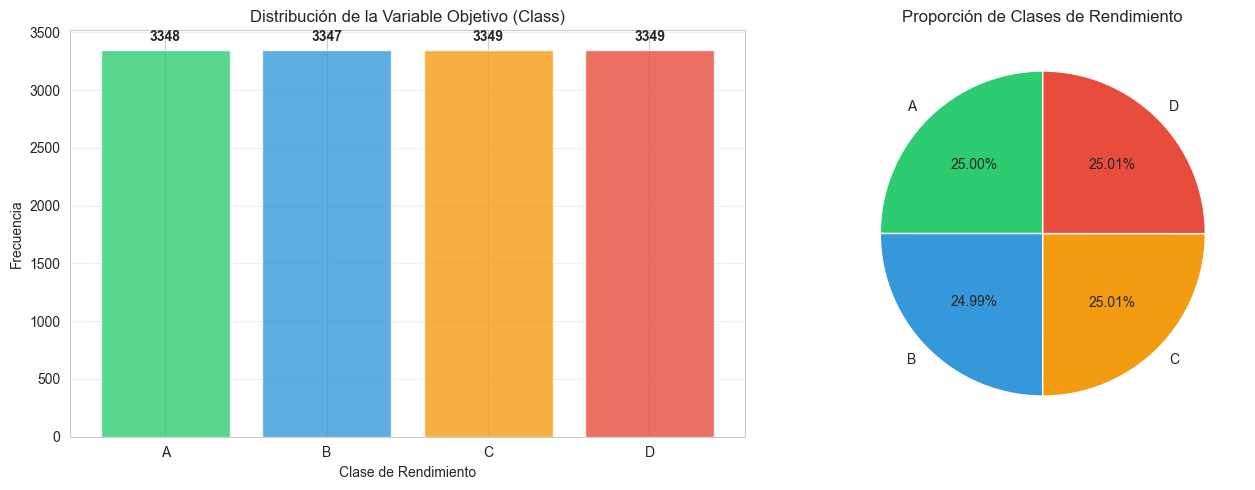


ANÁLISIS DE BALANCE DE CLASES
Diferencia entre clase más y menos frecuente: 2 registros
Desviación estándar de frecuencias: 0.96

Conclusión: El dataset está PERFECTAMENTE BALANCEADO (diferencia de solo 2 registros)


In [3]:
# Distribución de la variable objetivo (class)
print("=" * 80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: CLASS")
print("=" * 80)

# Conteo absoluto y porcentual
class_counts = df['class'].value_counts().sort_index()
class_percentages = df['class'].value_counts(normalize=True).sort_index() * 100

print("\nDistribución de clases:")
print(class_counts)
print("\nPorcentaje por clase:")
print(class_percentages.round(2))

# Visualización de la distribución de clases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(class_counts.index, class_counts.values, color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'], alpha=0.8)
axes[0].set_xlabel('Clase de Rendimiento')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de la Variable Objetivo (Class)')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
axes[1].pie(class_percentages.values, labels=class_percentages.index, autopct='%1.2f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Proporción de Clases de Rendimiento')

plt.tight_layout()
plt.show()

# Análisis de balance
print("\n" + "=" * 80)
print("ANÁLISIS DE BALANCE DE CLASES")
print("=" * 80)
max_diff = class_counts.max() - class_counts.min()
print(f"Diferencia entre clase más y menos frecuente: {max_diff} registros")
print(f"Desviación estándar de frecuencias: {class_counts.std():.2f}")
print("\nConclusión: El dataset está PERFECTAMENTE BALANCEADO (diferencia de solo 2 registros)")

No existe sesgo en la representación de las clases,significa que el dataset refleja una muestra equilibrada de personas con distintos niveles de
rendimiento físico.

Métricas como MAE,QWK,Spearman serán confiables y tendrán un comportamiento estable y representativo.

Los modelos ordinales aprenderán de forma homogénea todos los niveles y se permitirá una evaluación justa durante el train-test split

*ANALISIS DE VARIABLES DEMOGRÁFICAS*

ANÁLISIS DE VARIABLES DEMOGRÁFICAS

Estadísticas de Edad:
Edad mínima: 21.0
Edad máxima: 64.0
Edad promedio: 36.78
Mediana de edad: 32.0
Desviación estándar: 13.63

ANÁLISIS DE GÉNERO
gender
M    8467
F    4926
Name: count, dtype: int64

Porcentaje Masculino: 63.22%
Porcentaje Femenino: 36.78%


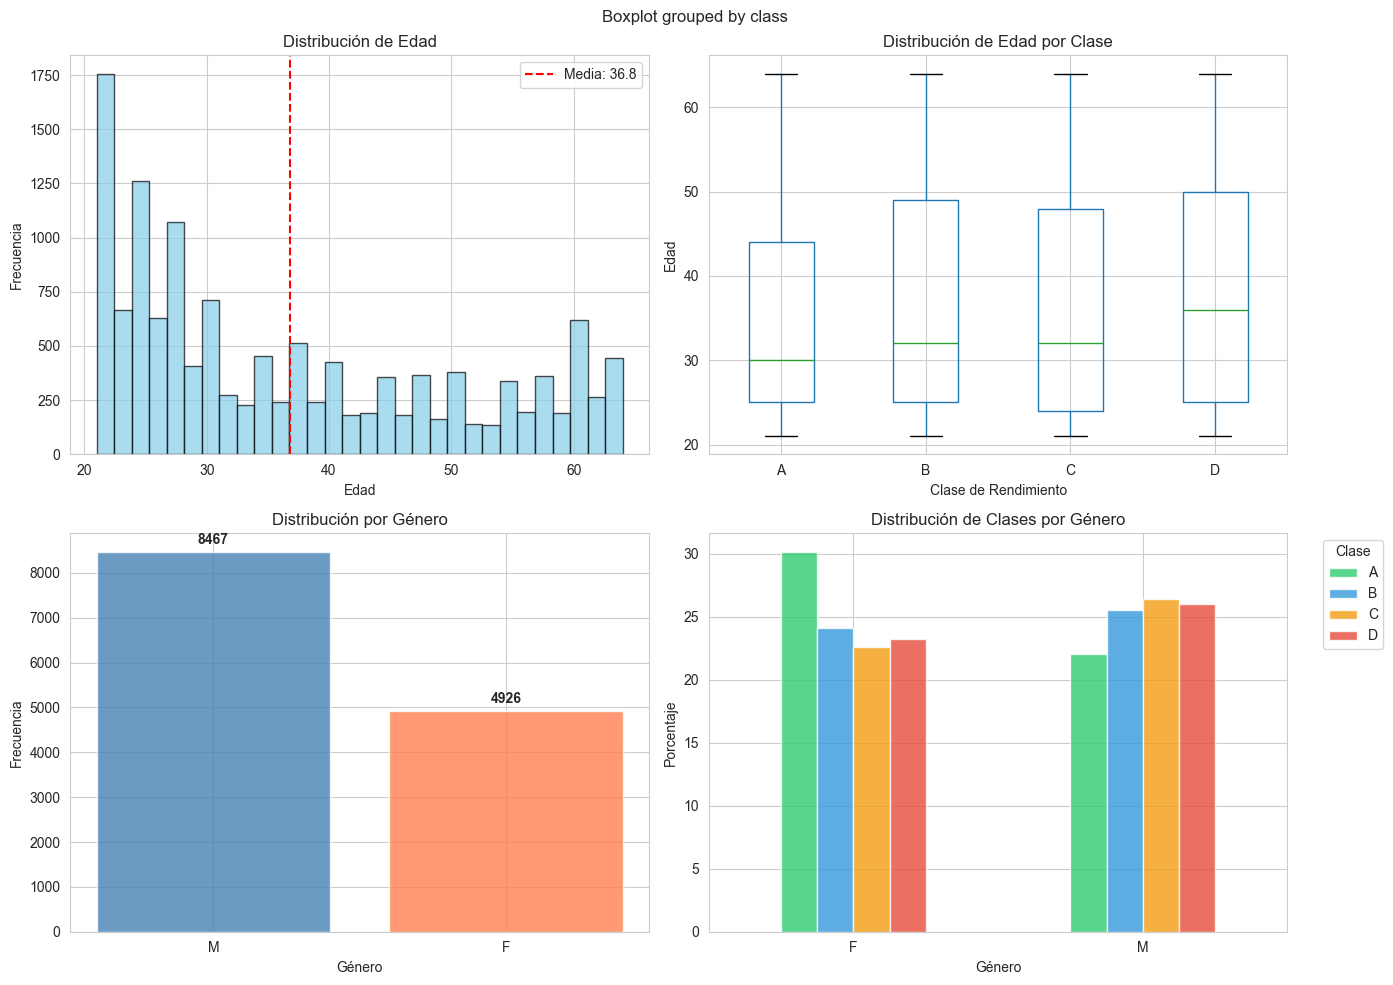

In [4]:
# Análisis de edad
print("=" * 80)
print("ANÁLISIS DE VARIABLES DEMOGRÁFICAS")
print("=" * 80)

print("\nEstadísticas de Edad:")
print(f"Edad mínima: {df['age'].min()}")
print(f"Edad máxima: {df['age'].max()}")
print(f"Edad promedio: {df['age'].mean():.2f}")
print(f"Mediana de edad: {df['age'].median()}")
print(f"Desviación estándar: {df['age'].std():.2f}")

# Visualización de edad
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución de edad
axes[0, 0].hist(df['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Edad')
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Media: {df["age"].mean():.1f}')
axes[0, 0].legend()

# Boxplot de edad por clase
df.boxplot(column='age', by='class', ax=axes[0, 1])
axes[0, 1].set_xlabel('Clase de Rendimiento')
axes[0, 1].set_ylabel('Edad')
axes[0, 1].set_title('Distribución de Edad por Clase')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Análisis de género
print("\n" + "=" * 80)
print("ANÁLISIS DE GÉNERO")
print("=" * 80)
gender_counts = df['gender'].value_counts()
print(gender_counts)
print(f"\nPorcentaje Masculino: {(gender_counts['M'] / len(df) * 100):.2f}%")
print(f"Porcentaje Femenino: {(gender_counts['F'] / len(df) * 100):.2f}%")

# Gráfico de género
axes[1, 0].bar(gender_counts.index, gender_counts.values, color=['steelblue', 'coral'], alpha=0.8)
axes[1, 0].set_xlabel('Género')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución por Género')
for i, v in enumerate(gender_counts.values):
    axes[1, 0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Distribución de género por clase
gender_class = pd.crosstab(df['gender'], df['class'], normalize='index') * 100
gender_class.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'], alpha=0.8)
axes[1, 1].set_xlabel('Género')
axes[1, 1].set_ylabel('Porcentaje')
axes[1, 1].set_title('Distribución de Clases por Género')
axes[1, 1].legend(title='Clase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.sca(axes[1, 1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

La edad promedio del dataset es de aproximadamente 37 años y la distribución etaria está fuertemente concentrada entre los 20 y 30 años, lo cual se asocia naturalmente con mayores niveles de rendimiento físico. Esto explica por qué las clases de mayor rendimiento tienden a agrupar sujetos más jóvenes.
Los boxplots confirman este patrón: las clases A y B presentan medianas de edad más bajas, mientras que la clase 'D' incluye tanto personas mayores como jóvenes con bajo rendimiento físico. Esto evidencia que la edad influye, pero no determina completamente el desempeño. O sea, por el sedentarismo actual y tipo de trabajo de 'oficina' es mas común ver jóvenes con bajo rendimiento fisico , lo cual podemos corroborar en la clase 'D' del boxplot.

*ANALISIS DE METRICAS CORPORALES*

ANÁLISIS DE VARIABLES ANTROPOMÉTRICAS

Estadísticas antropométricas por género:
       height_cm                                                  weight_kg  \
           count    mean   std    min    25%    50%    75%    max     count   
gender                                                                        
F         4926.0  160.49  5.65  125.0  156.6  160.5  164.3  179.0    4926.0   
M         8467.0  173.26  5.81  145.8  169.3  173.1  177.1  193.8    8467.0   

               ...              body fat_%                                \
         mean  ...   75%    max      count   mean   std  min   25%   50%   
gender         ...                                                         
F       56.91  ...  61.0  113.3     4926.0  28.49  6.22  3.5  24.1  28.3   
M       73.58  ...  79.0  138.1     8467.0  20.19  5.95  3.0  16.0  20.0   

                    
         75%   max  
gender              
F       32.6  53.5  
M       24.0  78.4  

[2 rows x 24 columns]


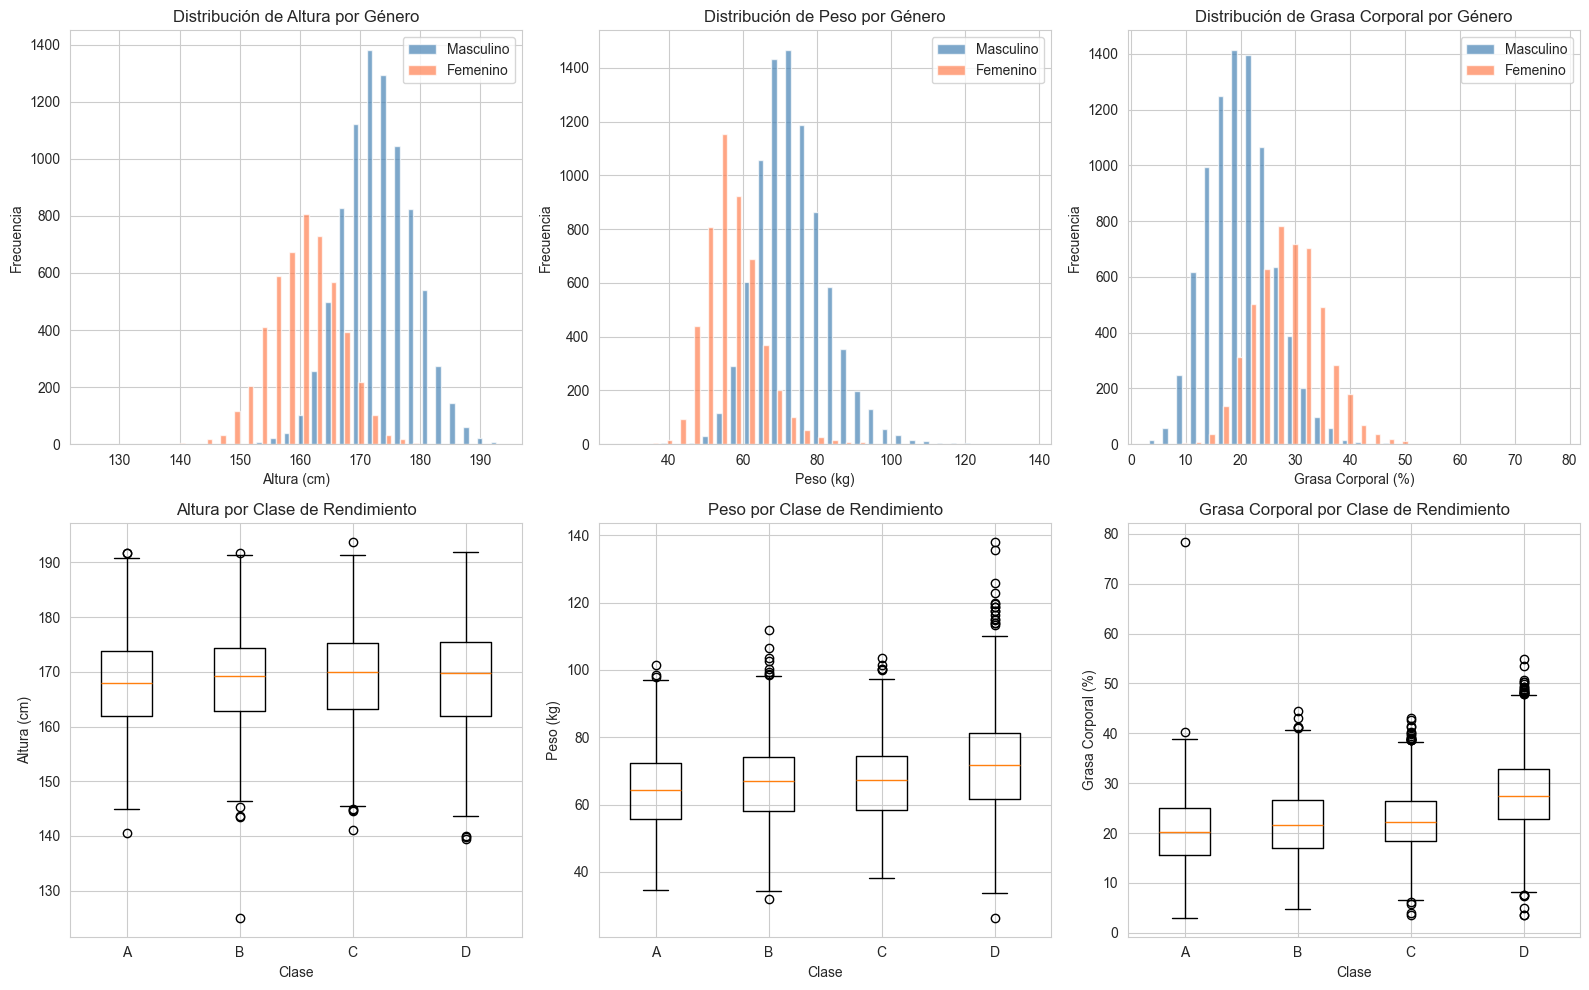


ANÁLISIS DE IMC (ÍNDICE DE MASA CORPORAL)
IMC promedio: 23.61
IMC mínimo: 11.10
IMC máximo: 42.91

IMC promedio por clase:
class
A    22.73
B    23.32
C    23.20
D    25.18
Name: BMI, dtype: float64


In [5]:
# Variables antropométricas: altura, peso, porcentaje de grasa corporal
print("=" * 80)
print("ANÁLISIS DE VARIABLES ANTROPOMÉTRICAS")
print("=" * 80)

# Estadísticas por género
print("\nEstadísticas antropométricas por género:")
anthropometric_vars = ['height_cm', 'weight_kg', 'body fat_%']
print(df.groupby('gender')[anthropometric_vars].describe().round(2))

# Visualización de variables antropométricas
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Distribución de Altura por Género
axes[0, 0].hist([df[df['gender']=='M']['height_cm'], df[df['gender']=='F']['height_cm']], 
                bins=30, label=['Masculino', 'Femenino'], color=['steelblue', 'coral'], alpha=0.7)
axes[0, 0].set_xlabel('Altura (cm)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Altura por Género')
axes[0, 0].legend()

# Distribución boxplot de Altura por Clase
axes[1, 0].boxplot([df[df['class']==c]['height_cm'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[1, 0].set_xlabel('Clase')
axes[1, 0].set_ylabel('Altura (cm)')
axes[1, 0].set_title('Altura por Clase de Rendimiento')

# Distribución de Peso por Género
axes[0, 1].hist([df[df['gender']=='M']['weight_kg'], df[df['gender']=='F']['weight_kg']], 
                bins=30, label=['Masculino', 'Femenino'], color=['steelblue', 'coral'], alpha=0.7)
axes[0, 1].set_xlabel('Peso (kg)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Peso por Género')
axes[0, 1].legend()

# Distribución boxplot de Peso por Clase
axes[1, 1].boxplot([df[df['class']==c]['weight_kg'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[1, 1].set_xlabel('Clase')
axes[1, 1].set_ylabel('Peso (kg)')
axes[1, 1].set_title('Peso por Clase de Rendimiento')

# Porcentaje de grasa corporal por Género
axes[0, 2].hist([df[df['gender']=='M']['body fat_%'], df[df['gender']=='F']['body fat_%']], 
                bins=30, label=['Masculino', 'Femenino'], color=['steelblue', 'coral'], alpha=0.7)
axes[0, 2].set_xlabel('Grasa Corporal (%)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Distribución de Grasa Corporal por Género')
axes[0, 2].legend()

# Boxplot de porcentaje de grasa corporal por Clase
axes[1, 2].boxplot([df[df['class']==c]['body fat_%'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[1, 2].set_xlabel('Clase')
axes[1, 2].set_ylabel('Grasa Corporal (%)')
axes[1, 2].set_title('Grasa Corporal por Clase de Rendimiento')

plt.tight_layout()
plt.show()

# IMC (Índice de Masa Corporal)
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
print("\n" + "=" * 80)
print("ANÁLISIS DE IMC (ÍNDICE DE MASA CORPORAL)")
print("=" * 80)
print(f"IMC promedio: {df['BMI'].mean():.2f}")
print(f"IMC mínimo: {df['BMI'].min():.2f}")
print(f"IMC máximo: {df['BMI'].max():.2f}")
print("\nIMC promedio por clase:")
print(df.groupby('class')['BMI'].mean().round(2))

*ANALISIS DE METRICAS DE RENDIMIENTO FISICO*

ANÁLISIS DE VARIABLES DE RENDIMIENTO FÍSICO

Estadísticas de variables de rendimiento:
       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm
count   13393.00                 13393.00        13393.00       13393.00
mean       36.96                    15.21           39.77         190.13
std        10.62                     8.46           14.28          39.87
min         0.00                   -25.00            0.00           0.00
25%        27.50                    10.90           30.00         162.00
50%        37.90                    16.20           41.00         193.00
75%        45.20                    20.70           50.00         221.00
max        70.50                   213.00           80.00         303.00

RENDIMIENTO FÍSICO POR CLASE
       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm
class                                                                   
A          38.62                    21.39           47.85         202.74
B      

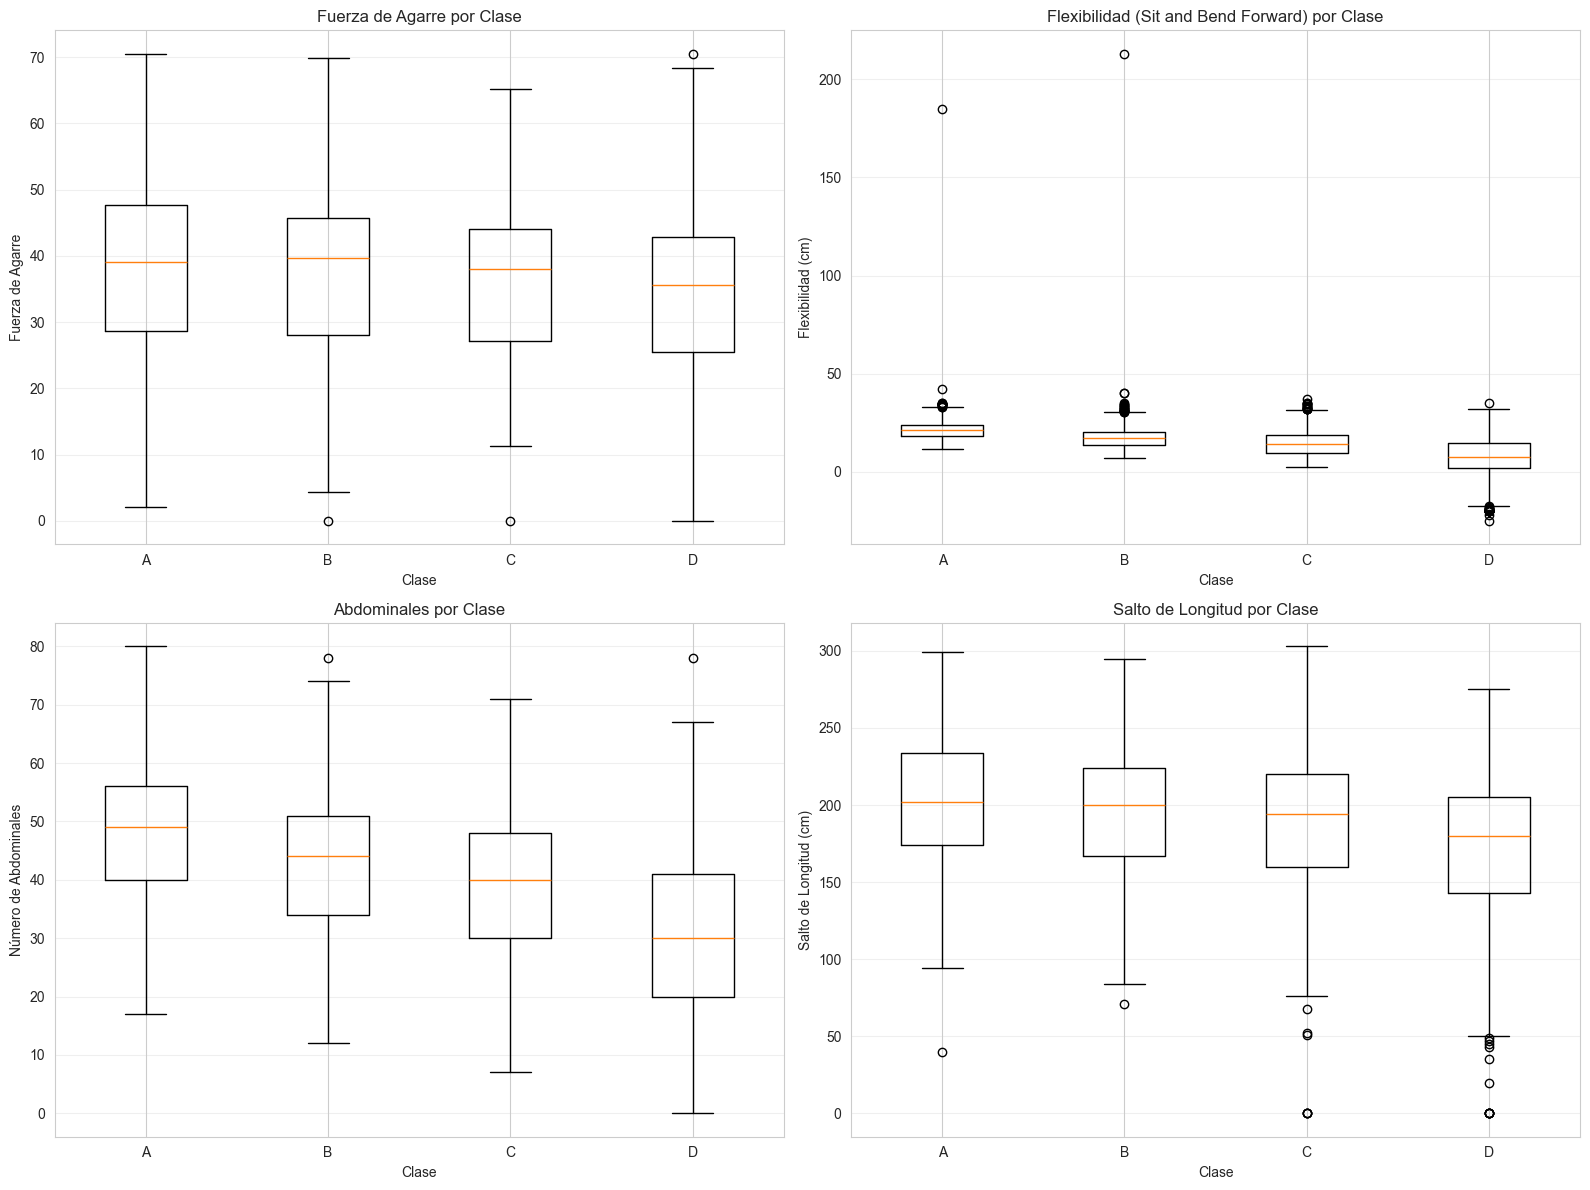

In [6]:
# Variables de rendimiento físico
print("=" * 80)
print("ANÁLISIS DE VARIABLES DE RENDIMIENTO FÍSICO")
print("=" * 80)

performance_vars = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

# Estadísticas descriptivas
print("\nEstadísticas de variables de rendimiento:")
print(df[performance_vars].describe().round(2))

# Estadísticas por clase
print("\n" + "=" * 80)
print("RENDIMIENTO FÍSICO POR CLASE")
print("=" * 80)
print(df.groupby('class')[performance_vars].mean().round(2))

# Visualización de variables de rendimiento
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribución boxplot de la Fuerza de agarre (gripForce)
axes[0, 0].boxplot([df[df['class']==c]['gripForce'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[0, 0].set_xlabel('Clase')
axes[0, 0].set_ylabel('Fuerza de Agarre')
axes[0, 0].set_title('Fuerza de Agarre por Clase')
axes[0, 0].grid(axis='y', alpha=0.3)

# Distribución boxplot de la Flexibilidad (Sit and bend forwad_cm)
axes[0, 1].boxplot([df[df['class']==c]['sit and bend forward_cm'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[0, 1].set_xlabel('Clase')
axes[0, 1].set_ylabel('Flexibilidad (cm)')
axes[0, 1].set_title('Flexibilidad (Sit and Bend Forward) por Clase')
axes[0, 1].grid(axis='y', alpha=0.3)

# Distribución boxplot de los Abdominales (Sit-ups counts)
axes[1, 0].boxplot([df[df['class']==c]['sit-ups counts'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[1, 0].set_xlabel('Clase')
axes[1, 0].set_ylabel('Número de Abdominales')
axes[1, 0].set_title('Abdominales por Clase')
axes[1, 0].grid(axis='y', alpha=0.3)

# Distribución boxplot del Salto de longitud (Broad jump_cm)
axes[1, 1].boxplot([df[df['class']==c]['broad jump_cm'] for c in ['A', 'B', 'C', 'D']], 
                    labels=['A', 'B', 'C', 'D'])
axes[1, 1].set_xlabel('Clase')
axes[1, 1].set_ylabel('Salto de Longitud (cm)')
axes[1, 1].set_title('Salto de Longitud por Clase')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Del grafico vemos que no hay mucha variacion en la fuerza de agarre entre las distintas clases. Las cajas (IQR) son bastante similares y se superponen en gran parte, indicando que gripForce no separa fuertemente las clases por sí sola.

Con respecto a la flexibilidad tampoco hay mucha variacion a excepcion  de la clase 'D', la cual muestra una mediana significativamente menor y con mayor variabilidad. Nos indica que la flexibilidad sí es un indicador útil para detectar bajo rendimiento (D), pero es menos efectiva para diferenciar entre A, B y C. Era de esperarse outliers para arriba en la clase 'A' y hacia abajo para la clase 'D'

En lo que respecta a abdominales si vemos una variacion mas acentuada , lo que nos dice que son un predictor fuerte en el rendimiento fisico global y tienen una relacion claramente ordinal.

Con respecto a 'salto' vemos un comportamiento similar al de 'fuerza de agarre'

*VARIABLES CARDIOVASCULARES*

ANÁLISIS DE VARIABLES CARDIOVASCULARES

Estadísticas de presión arterial:
       diastolic  systolic
count   13393.00  13393.00
mean       78.80    130.23
std        10.74     14.71
min         0.00      0.00
25%        71.00    120.00
50%        79.00    130.00
75%        86.00    141.00
max       156.20    201.00

Presión arterial promedio por clase:
       diastolic  systolic
class                     
A          77.90    129.29
B          78.66    130.64
C          78.55    129.93
D          80.08    131.08


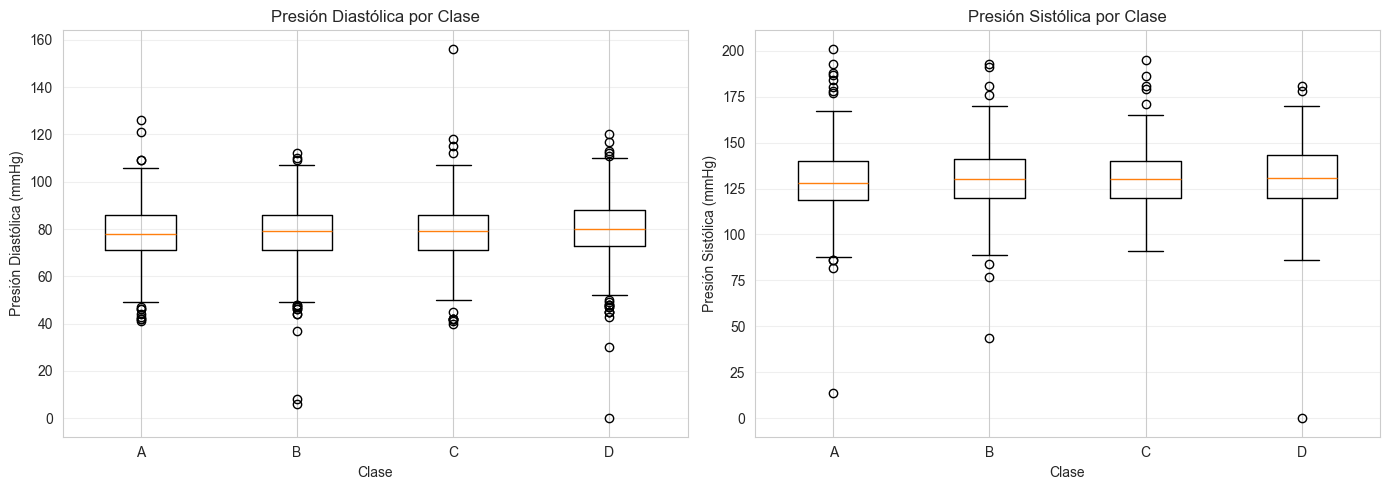


CLASIFICACIÓN DE PRESIÓN ARTERIAL
bp_category
Normal          4988
Hipertensión    4418
Elevada         3987
Name: count, dtype: int64

Distribución de categorías de presión arterial por clase:
bp_category    Elevada  Hipertensión     Normal
class                                          
A            28.912784     30.316607  40.770609
B            30.116522     32.954885  36.928593
C            30.546432     31.830397  37.623171
D            29.501344     36.846820  33.651836


In [7]:
# Variables cardiovasculares: presión diastólica y sistólica
print("=" * 80)
print("ANÁLISIS DE VARIABLES CARDIOVASCULARES")
print("=" * 80)

cardiovascular_vars = ['diastolic', 'systolic']

print("\nEstadísticas de presión arterial:")
print(df[cardiovascular_vars].describe().round(2))

print("\nPresión arterial promedio por clase:")
print(df.groupby('class')[cardiovascular_vars].mean().round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución boxplot de la Presión diastólica (Diastolic)
axes[0].boxplot([df[df['class']==c]['diastolic'] for c in ['A', 'B', 'C', 'D']], 
                labels=['A', 'B', 'C', 'D'])
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Presión Diastólica (mmHg)')
axes[0].set_title('Presión Diastólica por Clase')
axes[0].grid(axis='y', alpha=0.3)

# Distribución boxplot de la Presión sistólica (Systolic)
axes[1].boxplot([df[df['class']==c]['systolic'] for c in ['A', 'B', 'C', 'D']], 
                labels=['A', 'B', 'C', 'D'])
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Presión Sistólica (mmHg)')
axes[1].set_title('Presión Sistólica por Clase')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Clasificación de presión arterial
# Clasificamos todo como Normal
df['bp_category'] = 'Normal'
# Filtramos quienes tienen Presión elevada
df.loc[(df['systolic'] >= 130) | (df['diastolic'] >= 80), 'bp_category'] = 'Elevada'
# Filtramos quienes tienen Hipertensión
df.loc[(df['systolic'] >= 140) | (df['diastolic'] >= 90), 'bp_category'] = 'Hipertensión'

print("\n" + "=" * 80)
print("CLASIFICACIÓN DE PRESIÓN ARTERIAL")
print("=" * 80)
print(df['bp_category'].value_counts())
print("\nDistribución de categorías de presión arterial por clase:")
print(pd.crosstab(df['class'], df['bp_category'], normalize='index') * 100)

*ANALISIS DE CORRELACIONES*

ANÁLISIS DE CORRELACIONES


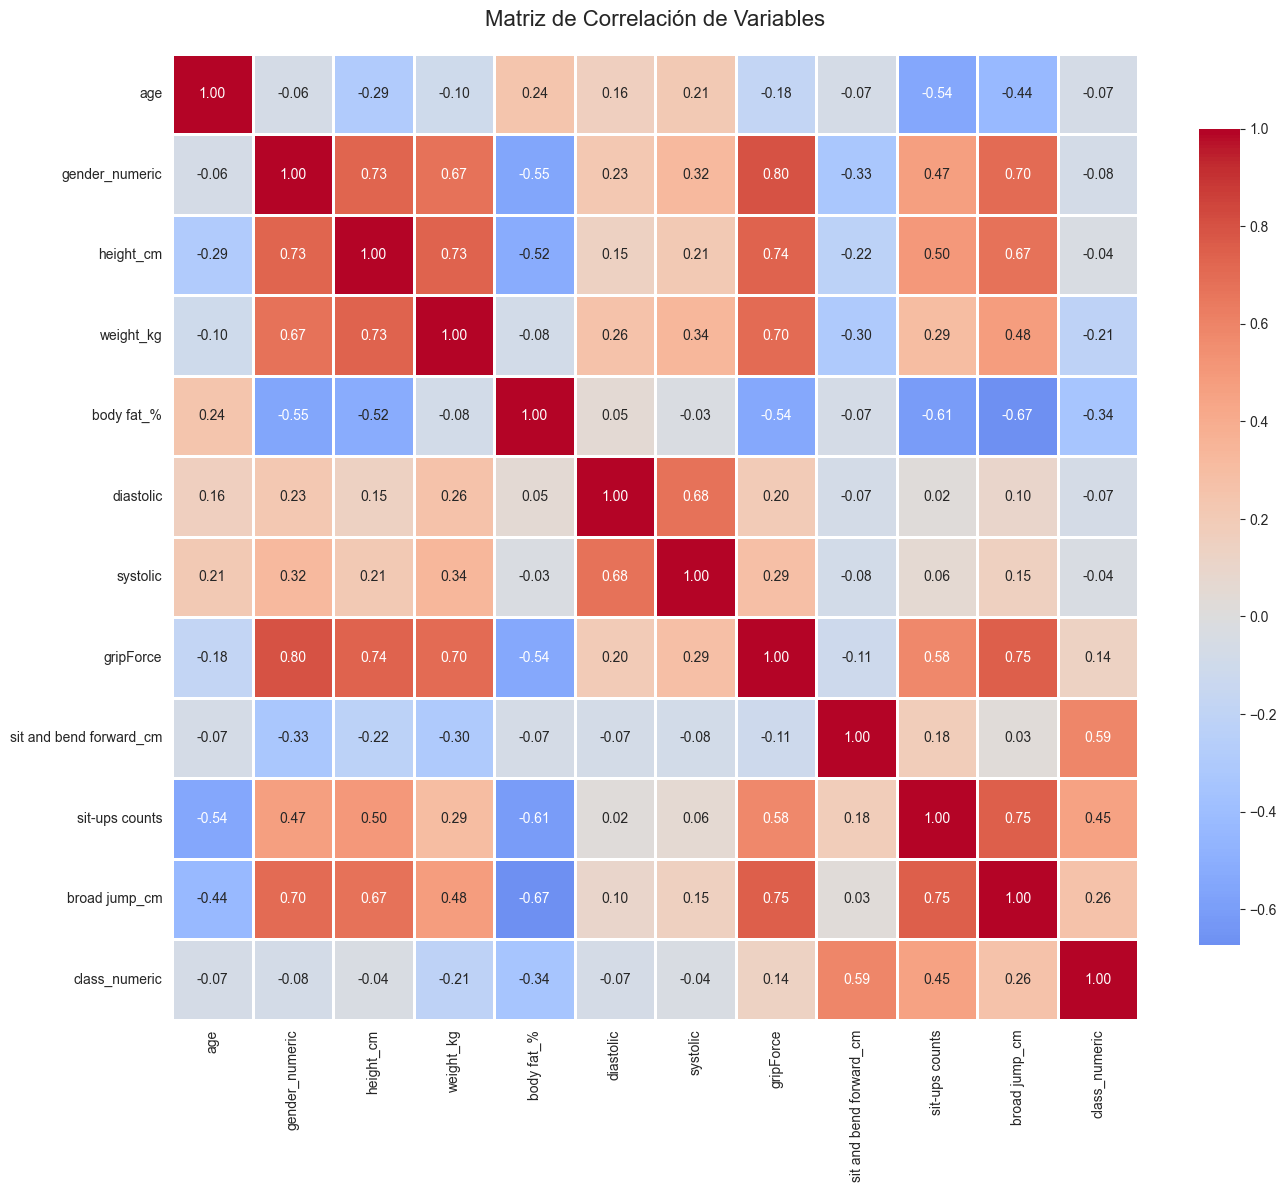


CORRELACIONES CON LA VARIABLE OBJETIVO (CLASS)
class_numeric              1.000000
sit and bend forward_cm    0.588123
sit-ups counts             0.452832
broad jump_cm              0.262154
gripForce                  0.136088
systolic                  -0.035484
height_cm                 -0.037753
age                       -0.065612
diastolic                 -0.066761
gender_numeric            -0.075605
weight_kg                 -0.214129
body fat_%                -0.341956
Name: class_numeric, dtype: float64


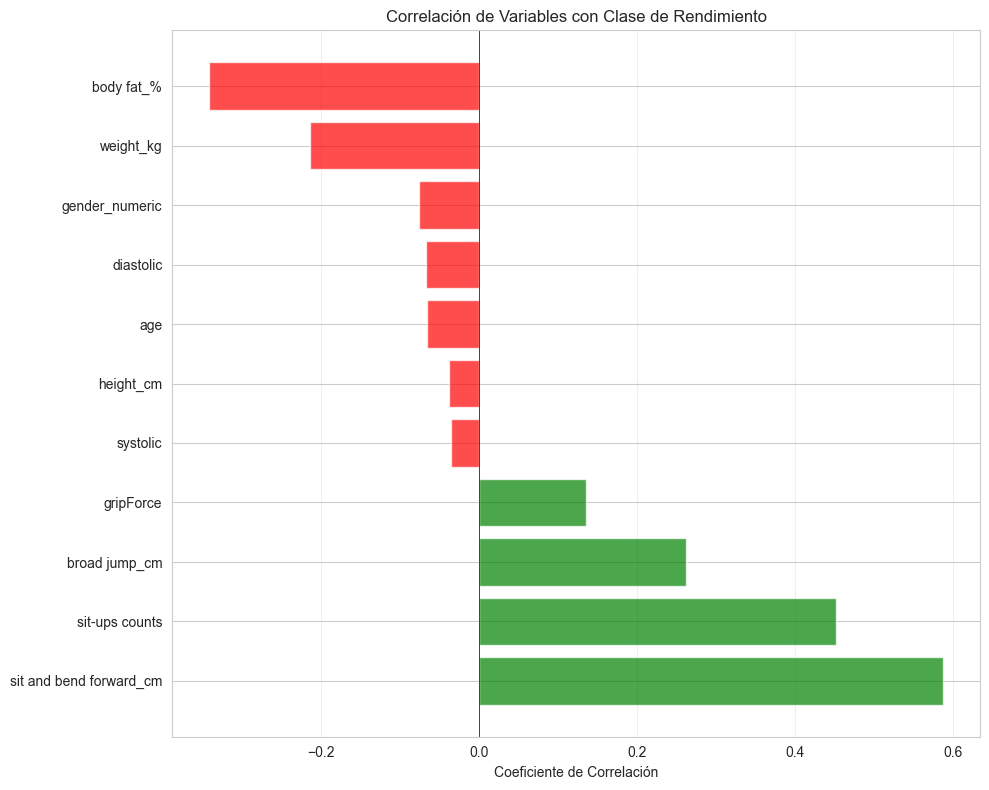


INTERPRETACIÓN DE CORRELACIONES

Correlaciones positivas más fuertes (mayor valor = mejor rendimiento):
  - sit and bend forward_cm: 0.588
  - sit-ups counts: 0.453
  - broad jump_cm: 0.262
  - gripForce: 0.136

Correlaciones negativas más fuertes (mayor valor = peor rendimiento):
  - body fat_%: -0.342
  - weight_kg: -0.214
  - gender_numeric: -0.076
  - diastolic: -0.067
  - age: -0.066
  - height_cm: -0.038
  - systolic: -0.035


In [8]:
# Matriz de correlación
print("=" * 80)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# Codificación numérica de variables categóricas para correlación
df_numeric = df.copy()
# Catalogamos la columna gender_numeric entre valores de 0 (mujer) o 1 (hombre)
df_numeric['gender_numeric'] = df_numeric['gender'].map({'M': 1, 'F': 0})
# Catalogamos la columna class_numeric según la clase a qué pertenecen
df_numeric['class_numeric'] = df_numeric['class'].map({'D': 0, 'C': 1, 'B': 2, 'A': 3})

# Selección de variables numéricas
numeric_cols = ['age', 'gender_numeric', 'height_cm', 'weight_kg', 'body fat_%', 
                'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 
                'sit-ups counts', 'broad jump_cm', 'class_numeric']

# Cálculo de matriz de correlación
correlation_matrix = df_numeric[numeric_cols].corr()

# Visualización de matriz de correlación completa
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n" + "=" * 80)
print("CORRELACIONES CON LA VARIABLE OBJETIVO (CLASS)")
print("=" * 80)
target_correlations = correlation_matrix['class_numeric'].sort_values(ascending=False)
print(target_correlations)

# Visualización de correlaciones con la variable objetivo
plt.figure(figsize=(10, 8))
target_correlations_filtered = target_correlations.drop('class_numeric')
colors = ['green' if x > 0 else 'red' for x in target_correlations_filtered.values]
plt.barh(range(len(target_correlations_filtered)), target_correlations_filtered.values, color=colors, alpha=0.7)
plt.yticks(range(len(target_correlations_filtered)), target_correlations_filtered.index)
plt.xlabel('Coeficiente de Correlación')
plt.title('Correlación de Variables con Clase de Rendimiento')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRETACIÓN DE CORRELACIONES")
print("=" * 80)
print("\nCorrelaciones positivas más fuertes (mayor valor = mejor rendimiento):")
positive_corr = target_correlations_filtered[target_correlations_filtered > 0].sort_values(ascending=False)
for var, corr in positive_corr.items():
    print(f"  - {var}: {corr:.3f}")

print("\nCorrelaciones negativas más fuertes (mayor valor = peor rendimiento):")
negative_corr = target_correlations_filtered[target_correlations_filtered < 0].sort_values()
for var, corr in negative_corr.items():
    print(f"  - {var}: {corr:.3f}")

*DETECCION DE OUTLIERS*

DETECCIÓN DE VALORES ATÍPICOS

Outliers detectados por método IQR (1.5 * IQR):
--------------------------------------------------------------------------------
age                           :    0 outliers (0.00%)
                                Rango válido: [-9.50, 82.50]
height_cm                     :   10 outliers (0.07%)
                                Rango válido: [143.80, 193.40]
weight_kg                     :   83 outliers (0.62%)
                                Rango válido: [32.55, 100.95]
body fat_%                    :   77 outliers (0.57%)
                                Rango válido: [3.00, 43.00]
diastolic                     :   54 outliers (0.40%)
                                Rango válido: [48.50, 108.50]
systolic                      :   29 outliers (0.22%)
                                Rango válido: [88.50, 172.50]
gripForce                     :    3 outliers (0.02%)
                                Rango válido: [0.95, 71.75]
sit and bend forward_cm       : 

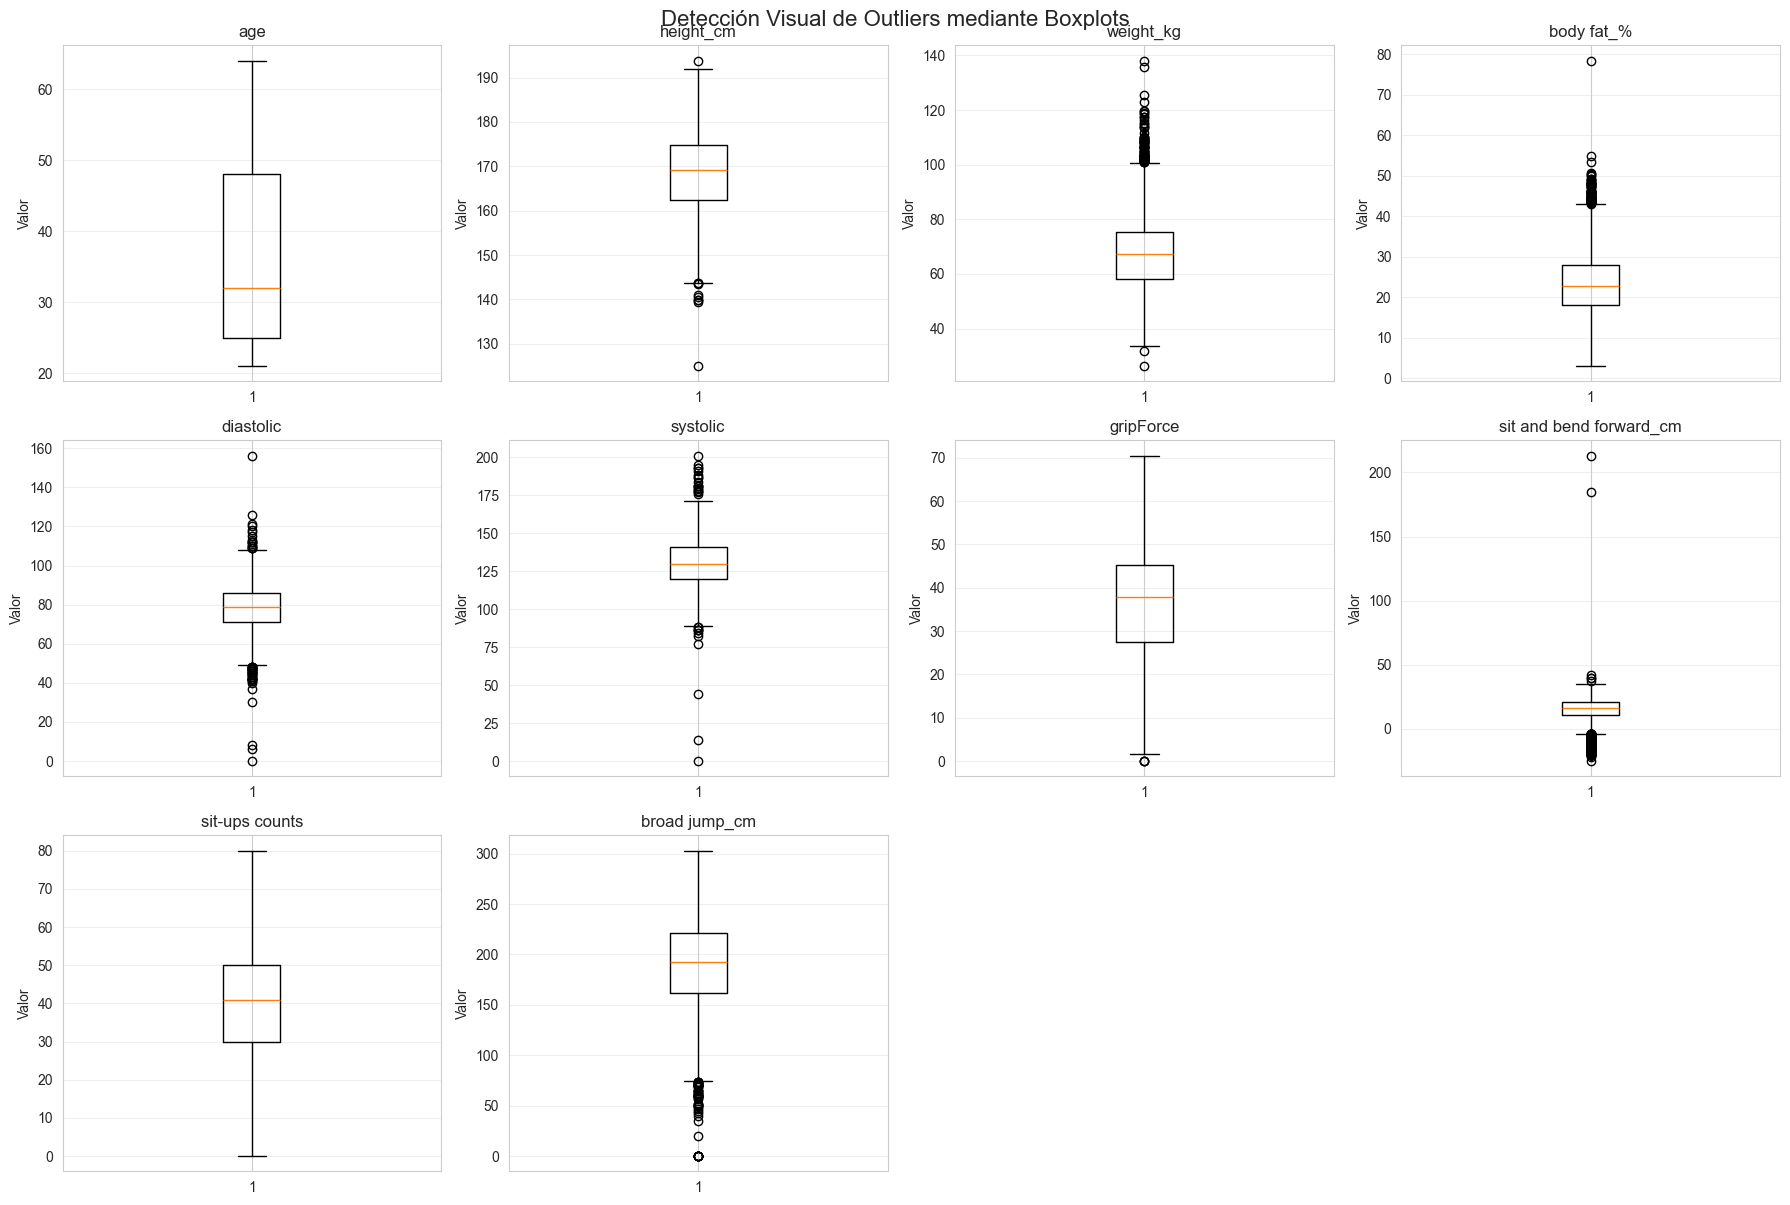


ANÁLISIS DE VALORES EXTREMOS ESPECÍFICOS
Registros con broad jump = 0: 10
Registros con sit-ups = 0: 125
Registros con gripForce < 10: 13
Registros con altura < 140 cm: 4
Registros con altura > 190 cm: 19


In [9]:
# Detección de outliers
print("=" * 80)
print("DETECCIÓN DE VALORES ATÍPICOS")
print("=" * 80)

# Variables numéricas para análisis de outliers
numeric_features = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 
                    'systolic', 'gripForce', 'sit and bend forward_cm', 
                    'sit-ups counts', 'broad jump_cm']

# Método IQR (Rango Intercuartílico)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutliers detectados por método IQR (1.5 * IQR):")
print("-" * 80)
outlier_summary = {}

# Calcular los outliers por cada variable numérica
for col in numeric_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary[col] = n_outliers
    print(f"{col:30s}: {n_outliers:4d} outliers ({n_outliers/len(df)*100:.2f}%)")
    print(f"{'':30s}  Rango válido: [{lower:.2f}, {upper:.2f}]")

# Visualización de boxplots para detección de outliers
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()

# Dibujar los boxplot de las variables numéricas
for idx, col in enumerate(numeric_features):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(axis='y', alpha=0.3)

# Eliminar ejes sobrantes
for idx in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('Detección Visual de Outliers mediante Boxplots', fontsize=16, y=1.00)
plt.show()

# Análisis de valores específicos
print("\n" + "=" * 80)
print("ANÁLISIS DE VALORES EXTREMOS ESPECÍFICOS")
print("=" * 80)
print(f"Registros con broad jump = 0: {(df['broad jump_cm'] == 0).sum()}")
print(f"Registros con sit-ups = 0: {(df['sit-ups counts'] == 0).sum()}")
print(f"Registros con gripForce < 10: {(df['gripForce'] < 10).sum()}")
print(f"Registros con altura < 140 cm: {(df['height_cm'] < 140).sum()}")
print(f"Registros con altura > 190 cm: {(df['height_cm'] > 190).sum()}")

*ANALISIS MULTIVARIADO*

ANÁLISIS MULTIVARIADO

Generando pairplot de variables clave...


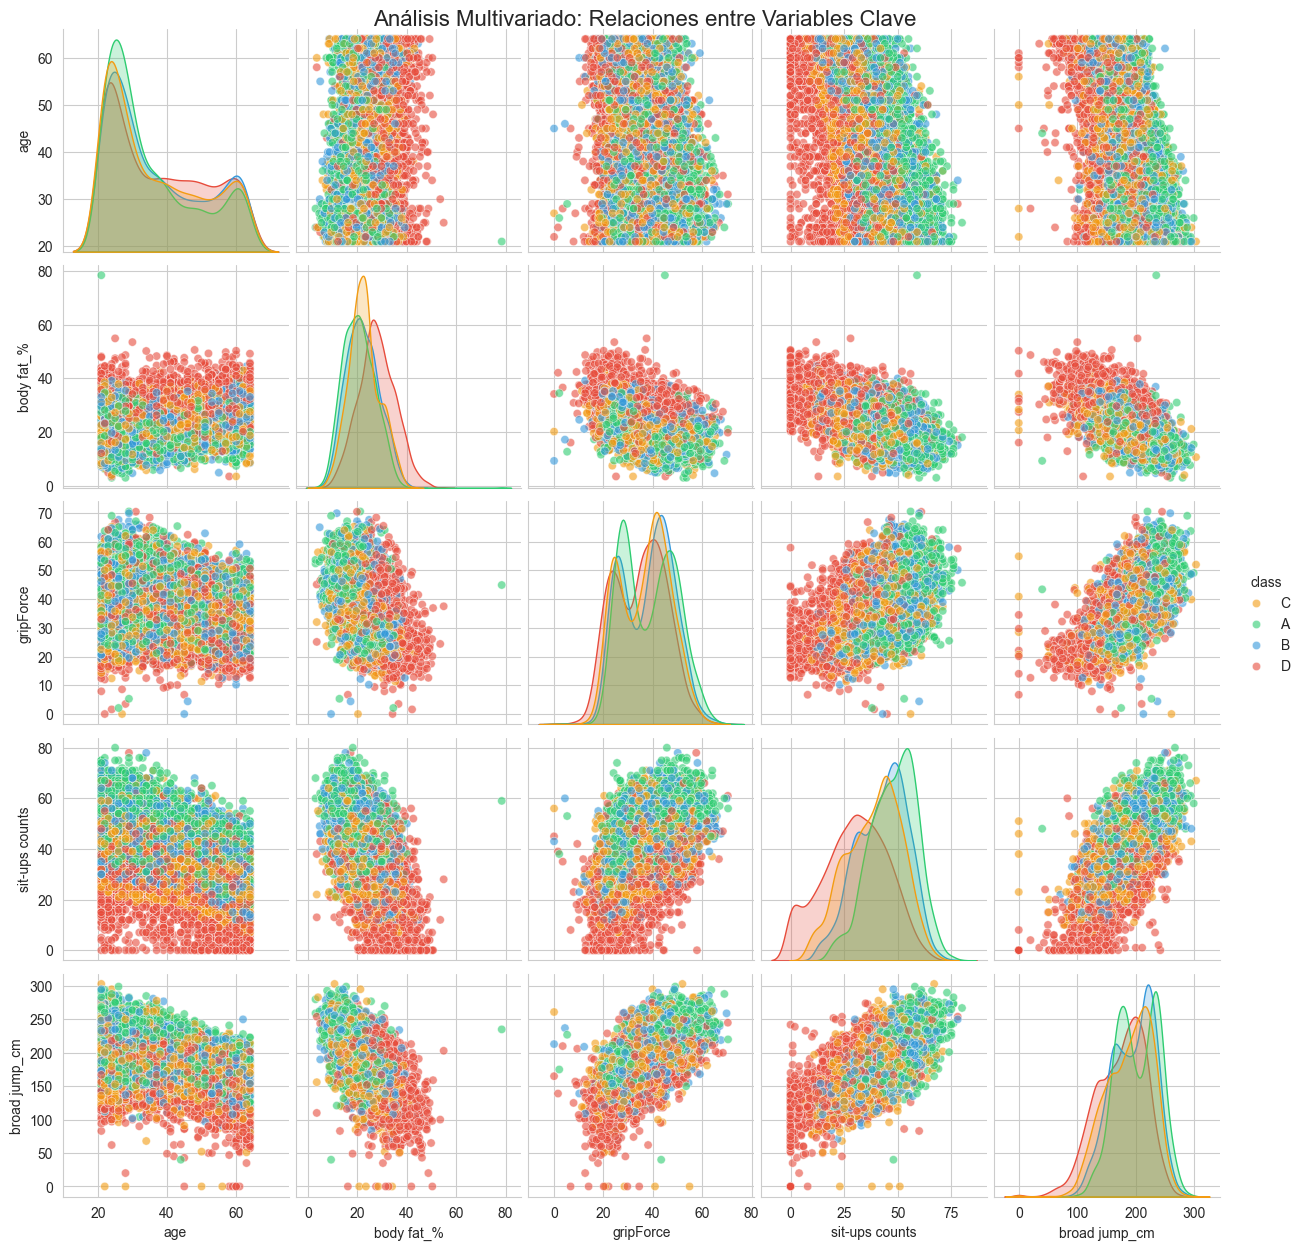

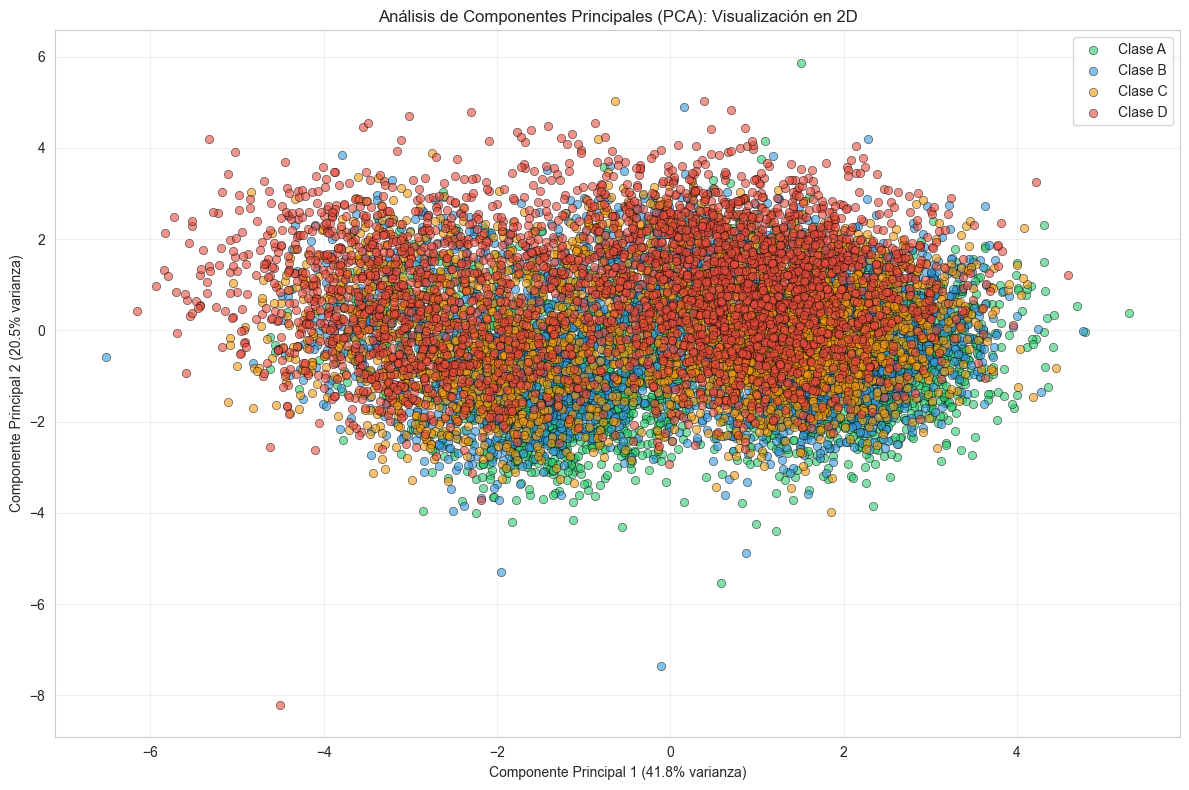


Varianza explicada por los dos primeros componentes: 62.35%

Contribución de variables al Componente Principal 1:
                  Variable  Contribución PC1
9            broad jump_cm          0.438810
6                gripForce          0.432373
1                height_cm          0.420726
8           sit-ups counts          0.378518
2                weight_kg          0.337152
3               body fat_%         -0.330651
0                      age         -0.208089
5                 systolic          0.143469
4                diastolic          0.106119
7  sit and bend forward_cm         -0.045463


In [10]:
# Análisis multivariado mediante pairplot
print("=" * 80)
print("ANÁLISIS MULTIVARIADO")
print("=" * 80)

# Selección de variables clave para pairplot
key_vars = ['age', 'body fat_%', 'gripForce', 'sit-ups counts', 'broad jump_cm', 'class']

# Pairplot
print("\nGenerando pairplot de variables clave...")
pairplot_fig = sns.pairplot(df[key_vars], hue='class', 
                            palette={'A': '#2ecc71', 'B': '#3498db', 'C': '#f39c12', 'D': '#e74c3c'},
                            diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
pairplot_fig.fig.suptitle('Análisis Multivariado: Relaciones entre Variables Clave', 
                          y=1.00, fontsize=16)
plt.show()

# Análisis de componentes principales (PCA) para visualización
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preparación de datos
X = df[numeric_features].values
y = df['class'].values

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización PCA
plt.figure(figsize=(12, 8))
for class_label, color in zip(['A', 'B', 'C', 'D'], ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']):
    mask = y == class_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label=f'Clase {class_label}', 
                alpha=0.6, edgecolors='k', linewidth=0.5)

plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Análisis de Componentes Principales (PCA): Visualización en 2D')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVarianza explicada por los dos primeros componentes: {sum(pca.explained_variance_ratio_[:2])*100:.2f}%")
print("\nContribución de variables al Componente Principal 1:")
pc1_contributions = pd.DataFrame({
    'Variable': numeric_features,
    'Contribución PC1': pca.components_[0]
}).sort_values('Contribución PC1', key=abs, ascending=False)
print(pc1_contributions)

Analisis del pairplot : ahi se muestran todas las combinaciones posibles de variables clave de 2 en 2, diferenciadas por color. Por ejemplo la clase 'A' tiene valores altos en gripForce, sit-ups y broad jump; mientras que la clase 'D' las lleva hacia abajo.

Vemos patrones bivariados logicos y coherentes en el sentido por ejemplo de la tendencia negativa entre broad jump_cm y age o entre body fat y grip force.

Vemos gran variabilidad dentro de cada clase,esto indica que el rendimiento físico es multidimensional, no depende de un solo indicado

El pairplot visualiza un gradiente suave entre clases, pero no clusters separados.
Esto es característico de variables que representan niveles progresivos (ordinalidad)

Interpretacion del PCA: separacion visual limitada , o sea las clases no forman clusters totalmente separados. Esto es normal porque la variable objetivo es ordinal y el PCA es un modelo lineal, no detecta fronteras no lineales.

Los 2 primeros componentes capturan una parte considerablemente buena de la estructura del dataset (41.8% + 20.5%)

Segun nuestra tabla de contribuciones arrojada, los valores negativos fuertes indican que PC1 decrece cuando estas variables aumentan. Los valores positivos fuertes (+0.33) indican que PC1 aumenta cuando estas variables aumentan. PC1 es un indicador de rendimiento global en el que:

Valores negativos de PC1 = mejor rendimiento físico

Valores positivos de PC1 = peor condición física

Porque las variables que indican buen rendimiento (salto, fuerza, abdominales, altura) tienen contribuciones negativas muy fuertes. Mientras que las variables 'body_fat' y 'edad' refuerzan esta interpretación: mayor grasa corporal y mayor edad → menor rendimiento físico general.

PC1 negativo → alto rendimiento (clases A/B)

PC1 positivo → bajo rendimiento (clases C/D)

Como conclusión final: variables con signo negativo bajan PC1 cuando aumentan, generando mejor rendimiento; mientras que variables con signo positivo suben PC1 cuando aumentan,generando peor rendimiento

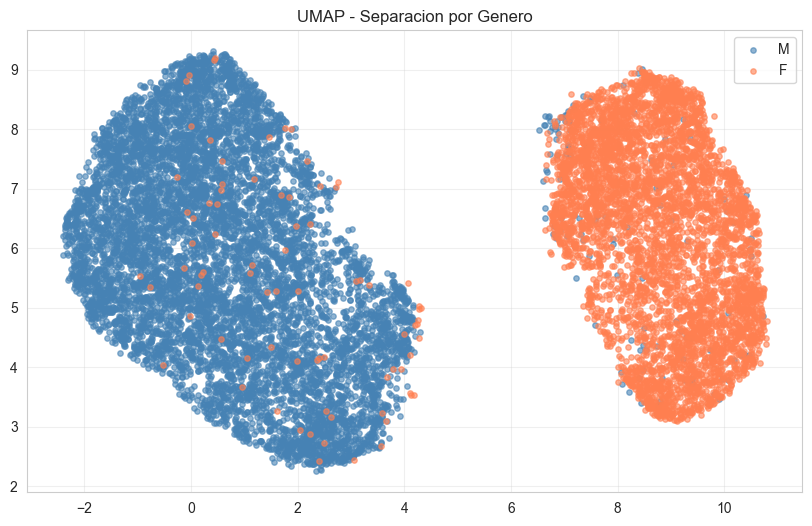

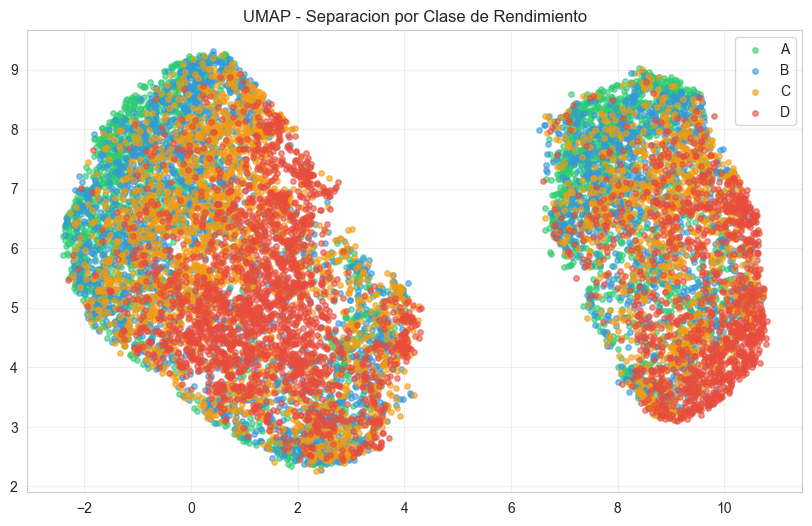

In [11]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar solo variables numericas
numeric_cols = [
    'age', 'height_cm', 'weight_kg', 'body fat_%',
    'diastolic', 'systolic', 'gripForce',
    'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'
]

X = df[numeric_cols].values
y_gender = df['gender'].values
y_class = df['class'].values

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP
umap_model = UMAP(n_neighbors=30, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot 1: color por gender
plt.figure(figsize=(10, 6))
for g, color in zip(['M', 'F'], ['steelblue', 'coral']):
    mask = y_gender == g
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], s=15, alpha=0.6, label=g, color=color)

plt.title("UMAP - Separacion por Genero")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot 2: color por class
plt.figure(figsize=(10, 6))
colors = {'A': '#2ecc71', 'B': '#3498db', 'C': '#f39c12', 'D': '#e74c3c'}

for c in ['A', 'B', 'C', 'D']:
    mask = y_class == c
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], s=15, alpha=0.6, label=c, color=colors[c])

plt.title("UMAP - Separacion por Clase de Rendimiento")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Dado que PCA solo sirve para relaciones lineales y en nuestro dataset ocurre que por lo general los hombres tienen mayor altura,peso,fuerza de agarre,salto de longitud, etc; estas diferencias son muy grandes a comparacion de las diferencias entre las clases. En otras palabras las clases de 'A' a 'D' son subgrupos dentro de cada género.

Justamente luego de haber aplicado UMAP vemos 2 grupos bien marcados (M y F) mientras que en la separacion por rendimiento no es tanto así. Podríamos decir que ser 'A' en grupo de hombres es diferente de ser 'A' en el grupo de mujeres.

ENTRENANDO RANDOM FOREST PARA GÉNERO: M
Accuracy CV (5-Fold): 0.7323 ± 0.0090

Accuracy en Test: 0.7509

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.74      0.79      0.76       373
           B       0.64      0.63      0.64       432
           C       0.74      0.73      0.73       448
           D       0.89      0.85      0.87       441

    accuracy                           0.75      1694
   macro avg       0.75      0.75      0.75      1694
weighted avg       0.75      0.75      0.75      1694



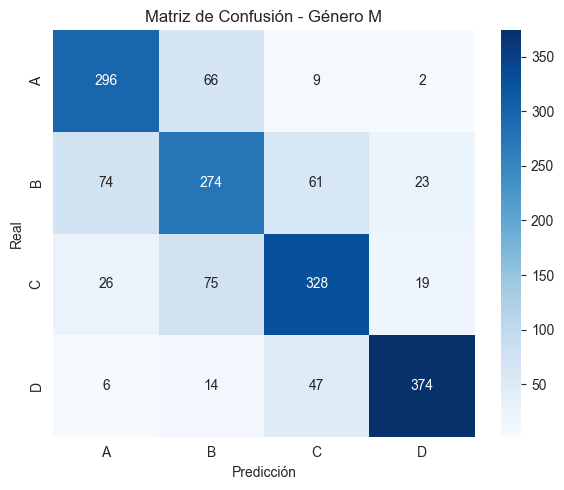

ENTRENANDO RANDOM FOREST PARA GÉNERO: F
Accuracy CV (5-Fold): 0.7404 ± 0.0141

Accuracy en Test: 0.7353

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.75      0.86      0.80       297
           B       0.59      0.51      0.55       237
           C       0.68      0.71      0.70       223
           D       0.92      0.82      0.87       229

    accuracy                           0.74       986
   macro avg       0.74      0.73      0.73       986
weighted avg       0.74      0.74      0.73       986



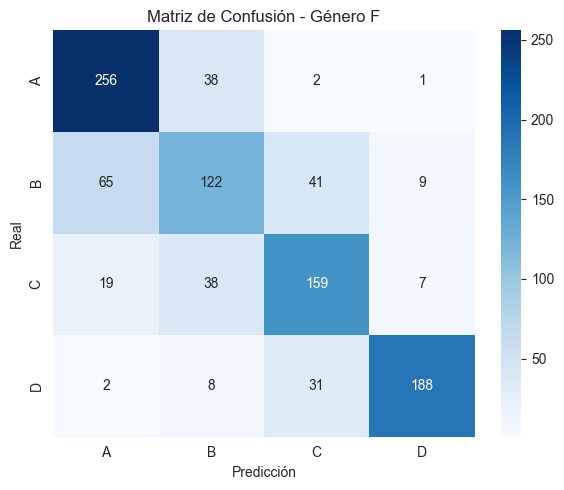

In [12]:
# =============================================
#  MODELOS RANDOM FOREST SEPARADOS POR GÉNERO
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------------------------
# 1. Asegurar feature BMI y definir variables predictoras
# ---------------------------------------------------------

if 'BMI' not in df.columns:
    df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100)**2

feature_cols = [
    'age',
    'height_cm',
    'weight_kg',
    'body fat_%',
    'diastolic',
    'systolic',
    'gripForce',
    'sit and bend forward_cm',
    'sit-ups counts',
    'broad jump_cm',
    'BMI'
]

# ---------------------------------------------------------
# 2. Función para entrenar un modelo Random Forest por género
# ---------------------------------------------------------

def train_rf_gender(df, gender_label):
    
    print("=" * 80)
    print(f"ENTRENANDO RANDOM FOREST PARA GÉNERO: {gender_label}")
    print("=" * 80)

    # Filtrar dataset
    df_g = df[df['gender'] == gender_label].copy()

    X = df_g[feature_cols]
    y = df_g['class']

    # Train-Test split estratificado
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Modelo Random Forest
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=42
    )

    # Cross-validation (5-fold)
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy CV (5-Fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Entrenamiento final
    rf.fit(X_train, y_train)

    # Evaluación en test
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\nAccuracy en Test: {acc:.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    labels = ['A', 'B', 'C', 'D']
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - Género {gender_label}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    return rf


# ---------------------------------------------------------
# 3. Entrenar ambos modelos
# ---------------------------------------------------------

model_m = train_rf_gender(df, 'M')
model_f = train_rf_gender(df, 'F')



 IMPORTANCIA DE VARIABLES (Mujeres vs Hombres)

                    Feature  Importance_M  Importance_F
0   sit and bend forward_cm      0.244787      0.244700
1            sit-ups counts      0.122299      0.165881
2                body fat_%      0.103779      0.079727
3                       age      0.093149      0.066841
4                 gripForce      0.076345      0.075539
5             broad jump_cm      0.072441      0.087684
6                       BMI      0.071807      0.075875
7                 weight_kg      0.066814      0.061268
8                 height_cm      0.056784      0.052246
9                  systolic      0.047151      0.046408
10                diastolic      0.044643      0.043832


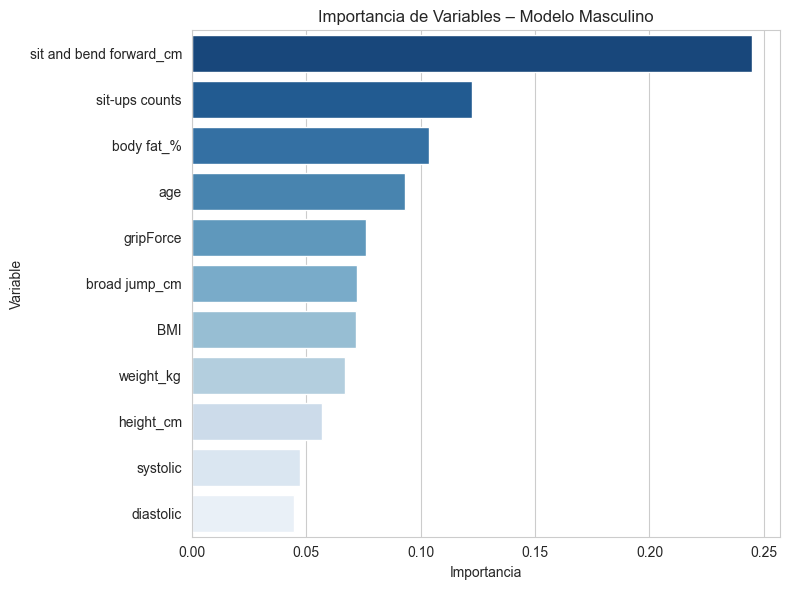

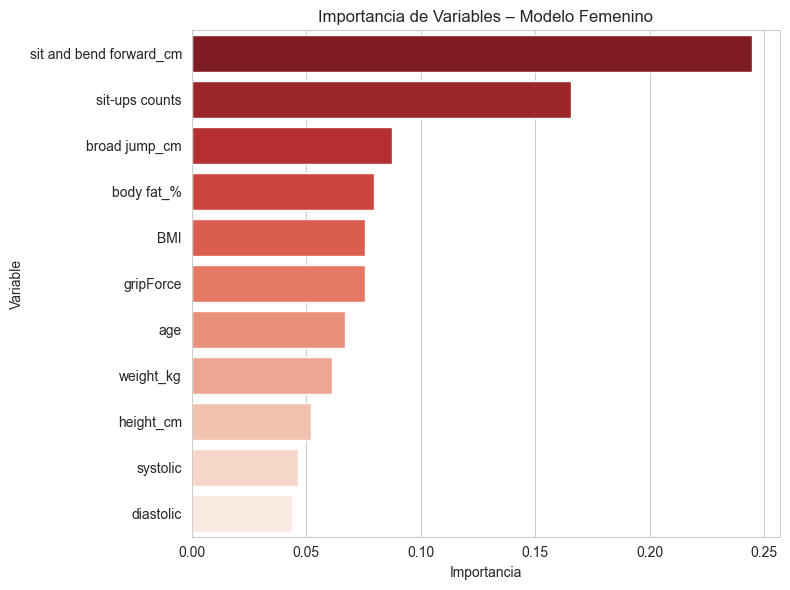

<Figure size 1000x600 with 0 Axes>

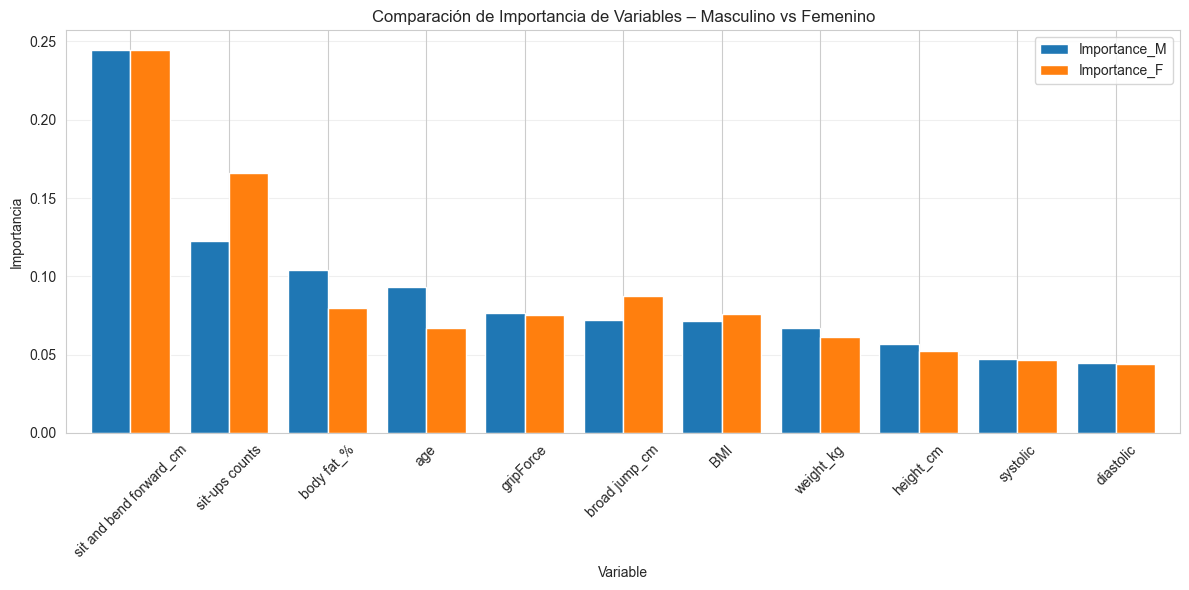

In [13]:
# ======================================================
#   FEATURE IMPORTANCE – MODELOS RANDOM FOREST POR GÉNERO
# ======================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- IMPORTANCIAS DEL MODELO MASCULINO ---
importance_m = pd.DataFrame({
    'Feature': feature_cols,
    'Importance_M': model_m.feature_importances_
}).sort_values('Importance_M', ascending=False)

# --- IMPORTANCIAS DEL MODELO FEMENINO ---
importance_f = pd.DataFrame({
    'Feature': feature_cols,
    'Importance_F': model_f.feature_importances_
}).sort_values('Importance_F', ascending=False)

# --- UNIR AMBAS TABLAS PARA COMPARACIÓN ---
importance_combined = importance_m.merge(importance_f, on="Feature")
importance_combined = importance_combined.sort_values("Importance_M", ascending=False)

print("\n==============================")
print(" IMPORTANCIA DE VARIABLES (Mujeres vs Hombres)")
print("==============================\n")
print(importance_combined)

# ======================================================
#   GRÁFICO DE IMPORTANCIAS – MODELO MASCULINO
# ======================================================

plt.figure(figsize=(8, 6))
sns.barplot(
    data=importance_m,
    x='Importance_M',
    y='Feature',
    palette="Blues_r"
)
plt.title("Importancia de Variables – Modelo Masculino")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# ======================================================
#   GRÁFICO DE IMPORTANCIAS – MODELO FEMENINO
# ======================================================

plt.figure(figsize=(8, 6))
sns.barplot(
    data=importance_f,
    x='Importance_F',
    y='Feature',
    palette="Reds_r"
)
plt.title("Importancia de Variables – Modelo Femenino")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# ======================================================
#   GRÁFICO COMPARATIVO (LADO A LADO)
# ======================================================

importance_plot = importance_combined.set_index("Feature")

plt.figure(figsize=(10, 6))
importance_plot.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Comparación de Importancia de Variables – Masculino vs Femenino")
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

*IMPLEMENTACIÓN*

In [15]:
import random
import numpy as np

Seed = 42
random.seed(Seed)
np.random.seed(Seed)

In [16]:
df_model = df.copy()
df_model['gender_numeric'] = df_model['gender'].map({'M': 1, 'F': 0})
class_map = {'D': 0, 'C': 1, 'B': 2, 'A': 3}
df_model['class'] = df_model['class'].map(class_map)

if 'BMI' not in df_model.columns:
    df_model['BMI'] = df_model['weight_kg'] / (df_model['height_cm'] / 100) ** 2

df_m = df_model[df_model['gender'] == 'M'].copy()
df_f = df_model[df_model['gender'] == 'F'].copy()

print("Tamaño hombres:", df_m.shape)
print("Tamaño mujeres:", df_f.shape)

X_m = df_m.drop(columns=['class', 'bp_category', 'gender', 'gender_numeric'])
Y_m = df_m['class']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_m, Y_m,
    test_size=0.2,
    stratify=Y_m,
    random_state=Seed
)

print("\nDistribución de clases (M) en train:")
print(y_train_m.value_counts(normalize=True).sort_index())
print("\nDistribución de clases (M) en test:")
print(y_test_m.value_counts(normalize=True).sort_index())

X_f = df_f.drop(columns=['class', 'bp_category', 'gender', 'gender_numeric'])
Y_f = df_f['class']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
        X_f, Y_f,
        test_size=0.2,
        stratify=Y_f,
        random_state=Seed
    )

print("\nDistribución de clases en train (F):")
print(y_train_f.value_counts(normalize=True).sort_index())
print("\nDistribución de clases en test (F):")
print(y_test_f.value_counts(normalize=True).sort_index())

Tamaño hombres: (8467, 15)
Tamaño mujeres: (4926, 15)

Distribución de clases (M) en train:
class
0    0.260298
1    0.264137
2    0.255426
3    0.220139
Name: proportion, dtype: float64

Distribución de clases (M) en test:
class
0    0.260331
1    0.264463
2    0.255018
3    0.220189
Name: proportion, dtype: float64

Distribución de clases en train (F):
class
0    0.232487
1    0.225635
2    0.240609
3    0.301269
Name: proportion, dtype: float64

Distribución de clases en test (F):
class
0    0.232252
1    0.226166
2    0.240365
3    0.301217
Name: proportion, dtype: float64


In [17]:
from mord import LogisticAT
from sklearn.metrics import mean_absolute_error, cohen_kappa_score

def entre_logisticAT(X_train, X_test, y_train, y_test, genero):
    print("\n" + "="*80)
    print(f"ENTRENANDO LogisticAT - Género {genero}")
    print("="*80)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    alphas = [0.01, 0.1, 1.0, 10.0]
    mejor_alpha = None
    mejor_qwk = -np.inf
    mejor_modelo = None

    for a in alphas:
        logit_ord = LogisticAT(alpha=a, max_iter=1000)
        logit_ord.fit(X_train_scaled, y_train)
        y_pred_val = logit_ord.predict(X_test_scaled)

        qwk = cohen_kappa_score(y_test, y_pred_val, weights='quadratic')
        if qwk >= mejor_qwk:
            mejor_qwk = qwk
            mejor_alpha = a
            mejor_modelo = logit_ord

    print(f"\nMejor alpha según QWK ({genero}): {mejor_alpha}")

    # Predicciones finales
    y_pred = mejor_modelo.predict(X_test_scaled)

    acc_final = accuracy_score(y_test, y_pred)
    mae_final = mean_absolute_error(y_test, y_pred)
    qwk_final = cohen_kappa_score(y_test, y_pred, weights='quadratic')

    print("\n" + "="*80)
    print(f"RESULTADOS FINALES: LogisticAT (Regresión Logística Ordinal) - Género {genero}")
    print("="*80)
    print(f"Accuracy en test   : {acc_final:.4f}")
    print(f"MAE ordinal        : {mae_final:.4f}")
    print(f"QWK (quadrático)   : {qwk_final:.4f}\n")

    print("Reporte de Clasificación (clases 0=D, 1=C, 2=B, 3=A):")
    print(classification_report(y_test, y_pred, digits=3))

    # Matriz de confusión
    cm_logit = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_logit,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['D','C','B','A'],
        yticklabels=['D','C','B','A']
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - LogisticAT (Género {genero})")
    plt.tight_layout()
    plt.show()

    # Coeficientes del modelo
    coef = mejor_modelo.coef_

    coef_df = pd.DataFrame({
        "variable": X_train.columns,
        "coeficiente": coef
    }).sort_values("coeficiente", ascending=False)

    print("\nCoeficientes (Género", genero, "):")
    print(coef_df)

    return mejor_modelo, scaler

In [18]:
df_model = df.copy()
df_model['gender_numeric'] = df_model['gender'].map({'M': 1, 'F': 0})
class_map = {'D': 0, 'C': 1, 'B': 2, 'A': 3}
df_model['class'] = df_model['class'].map(class_map)
if 'BMI' not in df_model.columns:
    df_model['BMI'] = df_model['weight_kg'] / (df_model['height_cm'] / 100) ** 2


X = df_model.drop(columns=['class', 'bp_category', 'gender'])
Y = df_model['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y,
    random_state=Seed
)

print("Distribución de clases en train:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nDistribución de clases en test:")
print(y_test.value_counts(normalize=True).sort_index())

Distribución de clases en train:
class
0    0.250047
1    0.250047
2    0.249953
3    0.249953
Name: proportion, dtype: float64

Distribución de clases en test:
class
0    0.250093
1    0.250093
2    0.249720
3    0.250093
Name: proportion, dtype: float64


Mejor alpha según QWK: 0.1

RESULTADOS FINALES: LogisticAT (Regresión Logística Ordinal)
Accuracy en test   : 0.5920
MAE ordinal        : 0.4464
QWK (quadrático)   : 0.7730

Reporte de Clasificación (clases 0=D, 1=C, 2=B, 3=A):
              precision    recall  f1-score   support

           0      0.823     0.700     0.756       670
           1      0.506     0.539     0.522       670
           2      0.426     0.534     0.473       669
           3      0.716     0.596     0.650       670

    accuracy                          0.592      2679
   macro avg      0.618     0.592     0.601      2679
weighted avg      0.618     0.592     0.601      2679



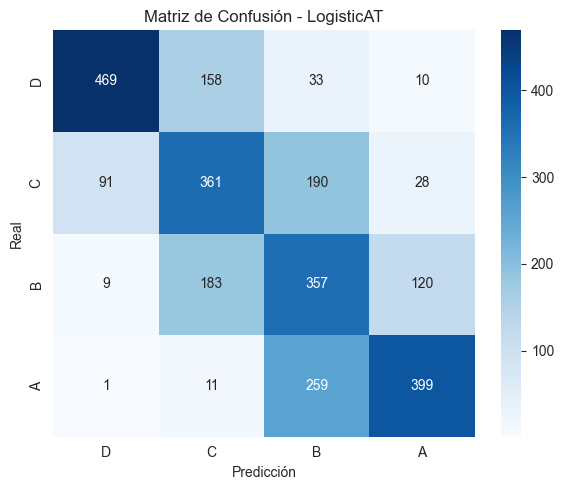

variable  coeficiente
8            sit-ups counts     1.929848
7   sit and bend forward_cm     1.615220
0                       age     1.313893
6                 gripForce     0.986090
9             broad jump_cm     0.619507
10                      BMI     0.369684
1                 height_cm     0.367852
5                  systolic     0.073836
4                 diastolic    -0.119728
3                body fat_%    -0.153209
11           gender_numeric    -1.231044
2                 weight_kg    -1.638131

In [19]:
from mord import LogisticAT
from sklearn.metrics import mean_absolute_error, cohen_kappa_score

# Escalado de X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Busqueda de alpha (L2)
alphas = [0.01, 0.1, 1.0, 10.0]

mejor_alpha = None
mejor_qwk = -np.inf
mejor_modelo = None

for a in alphas:
    logit_ord = LogisticAT(alpha=a, max_iter=1000)
    logit_ord.fit(X_train_scaled, y_train)
    y_pred_val = logit_ord.predict(X_test_scaled)

    qwk = cohen_kappa_score(y_test, y_pred_val, weights='quadratic')

    if qwk >= mejor_qwk:
        mejor_qwk = qwk
        mejor_alpha = a
        mejor_modelo = logit_ord

print(f"Mejor alpha según QWK: {mejor_alpha}")

# Predicciones finales con el mejor modelo encontrado
y_pred_logit = mejor_modelo.predict(X_test_scaled)

acc_final = accuracy_score(y_test, y_pred_logit)
mae_final = mean_absolute_error(y_test, y_pred_logit)
qwk_final = cohen_kappa_score(y_test, y_pred_logit, weights='quadratic')

print("\n" + "="*80)
print("RESULTADOS FINALES: LogisticAT (Regresión Logística Ordinal)")
print("="*80)
print(f"Accuracy en test   : {acc_final:.4f}")
print(f"MAE ordinal        : {mae_final:.4f}")
print(f"QWK (quadrático)   : {qwk_final:.4f}\n")

print("Reporte de Clasificación (clases 0=D, 1=C, 2=B, 3=A):")
print(classification_report(y_test, y_pred_logit, digits=3))

# Matriz de confusión
cm_logit = confusion_matrix(y_test, y_pred_logit)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_logit,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['D','C','B','A'],
    yticklabels=['D','C','B','A']
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión - LogisticAT")
plt.tight_layout()
plt.show()

# Coeficientes del modelo
coef = mejor_modelo.coef_     

coef_df = pd.DataFrame({
    "variable": X_train.columns,
    "coeficiente": coef
}).sort_values("coeficiente", ascending=False)

coef_df

In [20]:
df_model = df.copy()
df_model['gender_numeric'] = df_model['gender'].map({'M': 1, 'F': 0})
class_map = {'D': 0, 'C': 1, 'B': 2, 'A': 3}
df_model['class'] = df_model['class'].map(class_map)
if 'BMI' not in df_model.columns:
    df_model['BMI'] = df_model['weight_kg'] / (df_model['height_cm'] / 100) ** 2


X = df_model.drop(columns=['class', 'bp_category', 'gender'])
Y = df_model['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y,
    random_state=Seed
)

print("Distribución de clases en train:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nDistribución de clases en test:")
print(y_test.value_counts(normalize=True).sort_index())

Distribución de clases en train:
class
0    0.250047
1    0.250047
2    0.249953
3    0.249953
Name: proportion, dtype: float64

Distribución de clases en test:
class
0    0.250093
1    0.250093
2    0.249720
3    0.250093
Name: proportion, dtype: float64


In [21]:
import xgboost as xgb
import numpy as np
import shap
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score, confusion_matrix, classification_report
shap.initjs()

def fit_xgb_ordinal(X_train, y_train):
    models = []

    # Umbrales para clases 0,1,2,3
    for k in [0, 1, 2]:
        y_bin = (y_train > k).astype(int)

        model = xgb.XGBClassifier(
            objective="binary:logistic",
            tree_method="hist",
            n_estimators=150,
            random_state=Seed,
            learning_rate=0.05,
        )

        model.fit(X_train, y_bin)
        models.append(model)

    return models

def predict_xgb_ordinal(models, X):
    # Probabilidades P(y > k)
    probs = [m.predict_proba(X)[:, 1] for m in models]
    probs = np.vstack(probs).T 

    preds = []
    for p0, p1, p2 in probs:

        if p0 < 0.5:
            preds.append(0)
        elif p1 < 0.5:
            preds.append(1)
        elif p2 < 0.5:
            preds.append(2)
        else:
            preds.append(3)

    return np.array(preds)


def evaluar_xgb_ordinal(X_train, X_test, y_train, y_test):

    models = fit_xgb_ordinal(X_train, y_train)
    y_pred = predict_xgb_ordinal(models, X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    qwk = cohen_kappa_score(y_test, y_pred, weights='quadratic')

    print("\n" + "="*80)
    print("Resultados con XGBOOST ordinal")
    print("="*80)
    print(f"Accuracy : {acc:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"QWK      : {qwk:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Purples',
        xticklabels=['D', 'C', 'B', 'A'],
        yticklabels=['D', 'C', 'B', 'A']
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión - XGBoost Ordinal")
    plt.tight_layout()
    plt.show()

    return models, y_pred

def shap_xgb_ordinal(models, X_test):
    shap_results = []

    for idx, model in enumerate(models):
        explainer = shap.TreeExplainer(model, model_output="raw")
        shap_values = explainer.shap_values(X_test)
        shap_results.append(shap_values)  
    shap_mean = np.mean(shap_results, axis=0)
    shap.summary_plot(
            shap_mean,
            X_test,
            feature_names=X_test.columns,
            show=False
        )      
    return shap_mean


def inspeccionar_prediccion(models, X_test, y_test, y_pred, i):
    print("\n" + "="*90)
    print(f"Fila i={i}")
    print("="*90)

    print("\nValores de entrada:")
    display(X_test.iloc[i])

    print("\nClase real:", y_test.iloc[i])
    print("Clase predicha:", y_pred[i])

    # Probabilidades internas p(y > k)
    print("\nProbabilidades internas P(y > k):")
    for k, model in enumerate(models):
        proba = model.predict_proba(X_test.iloc[[i]])[0, 1]
        print(f"  P(y > {k}) = {proba:.4f}")

    for k, model in enumerate(models):
        print(f"\n===== SHAP para modelo y>{k}=====")

        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test.iloc[[i]])

        shap.force_plot(
            explainer.expected_value,
            shap_values[0],
            X_test.iloc[i],
            matplotlib=True
        )



def errores_por_distancia(y_test, y_pred):
    distancias = np.abs(y_test - y_pred)

    resultados = {
        "0 clases (correctos)": np.mean(distancias == 0) * 100,
        "1 clase": np.mean(distancias == 1) * 100,
        "2 clases": np.mean(distancias == 2) * 100,
        "3 clases": np.mean(distancias == 3) * 100,
    }

    print("\nDistribución del error según la distancia ordinal:")
    for k, v in resultados.items():
        print(f"  {k}: {v:.1f}%")

    return resultados



Resultados con XGBOOST ordinal
Accuracy : 0.7458
MAE      : 0.2956
QWK      : 0.8440


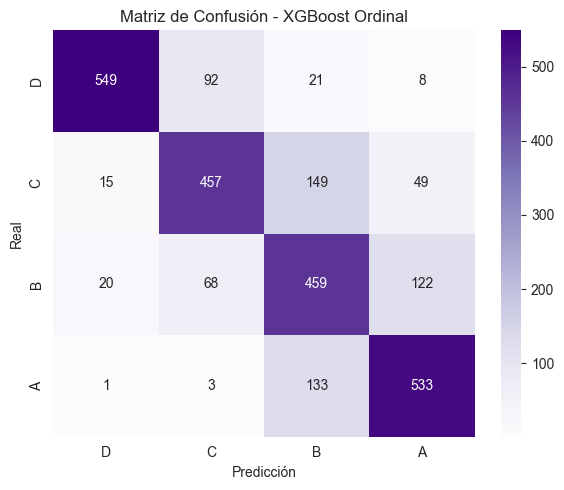


Distribución del error según la distancia ordinal:
  0 clases (correctos): 74.6%
  1 clase: 21.6%
  2 clases: 3.5%
  3 clases: 0.3%

Fila i=5

Valores de entrada:


age                         37.000000
height_cm                  156.500000
weight_kg                   56.000000
body fat_%                  31.900000
diastolic                   62.000000
systolic                   103.000000
gripForce                   22.000000
sit and bend forward_cm     15.800000
sit-ups counts               7.000000
broad jump_cm              158.000000
BMI                         22.864375
gender_numeric               0.000000
Name: 6000, dtype: float64


Clase real: 0
Clase predicha: 0

Probabilidades internas P(y > k):
  P(y > 0) = 0.0204
  P(y > 1) = 0.0061
  P(y > 2) = 0.0006

===== SHAP para modelo y>0=====


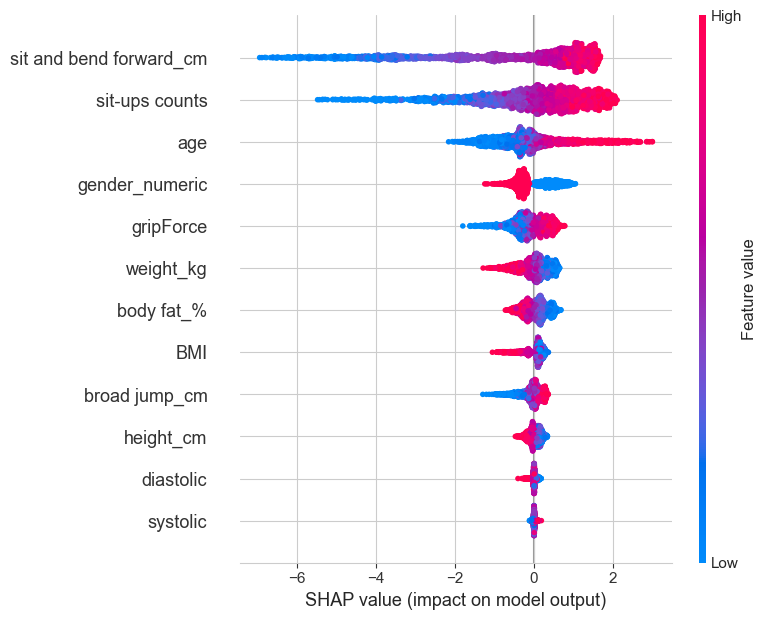

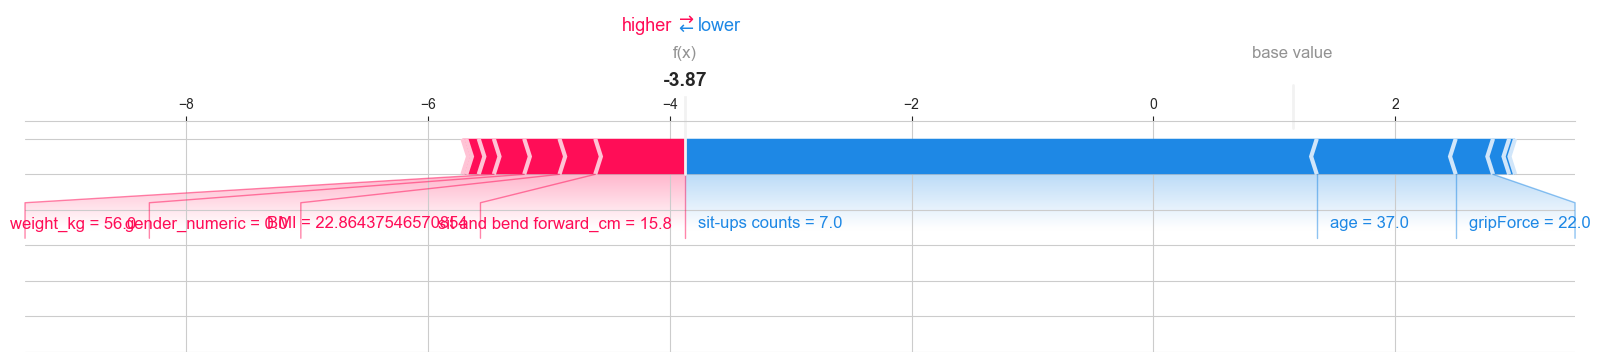


===== SHAP para modelo y>1=====


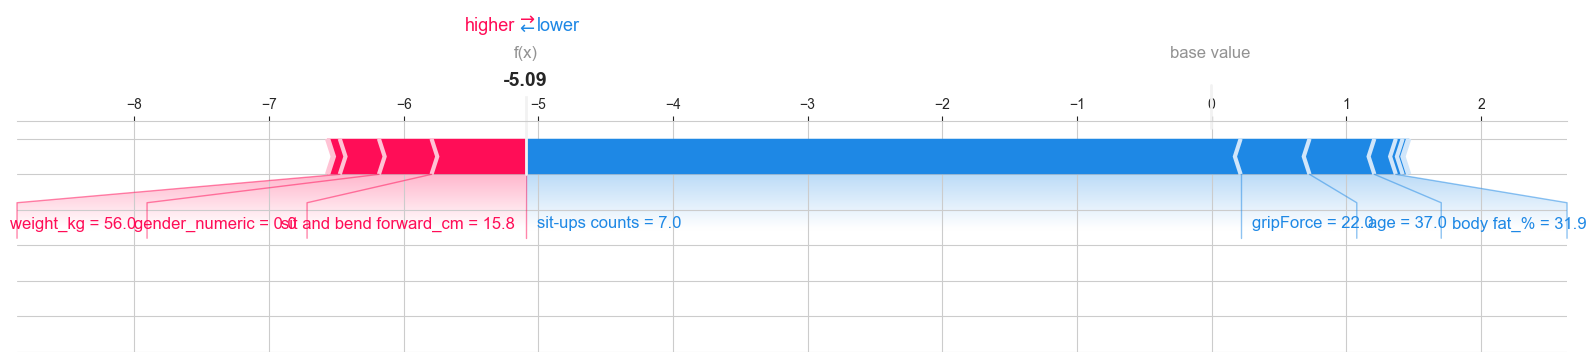


===== SHAP para modelo y>2=====


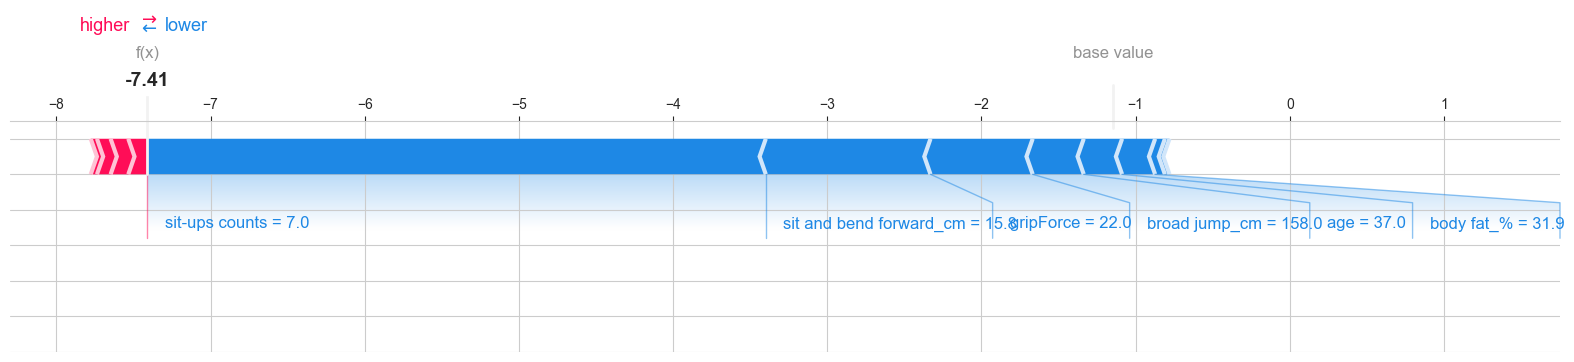

In [22]:
models, y_pred = evaluar_xgb_ordinal(X_train, X_test, y_train, y_test)
dist_error = errores_por_distancia(y_test.values, y_pred)
shap_xgb_ordinal(models, X_test)

i = 5
inspeccionar_prediccion(models, X_test, y_test, y_pred, i)